<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-&amp;-Modules" data-toc-modified-id="Data-&amp;-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data &amp; Modules</a></span></li><li><span><a href="#Individual-Visualisation" data-toc-modified-id="Individual-Visualisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Individual Visualisation</a></span></li><li><span><a href="#Data-Merge" data-toc-modified-id="Data-Merge-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Merge</a></span><ul class="toc-item"><li><span><a href="#Injury-and-Play-Visualization" data-toc-modified-id="Injury-and-Play-Visualization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Injury and Play Visualization</a></span></li><li><span><a href="#Injury,-Play-and-Game-Visualization" data-toc-modified-id="Injury,-Play-and-Game-Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Injury, Play and Game Visualization</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Machine Learning</a></span></li><li><span><a href="#Deep-Dive" data-toc-modified-id="Deep-Dive-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Deep Dive</a></span><ul class="toc-item"><li><span><a href="#Player-connection-with-Field" data-toc-modified-id="Player-connection-with-Field-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Player connection with Field</a></span></li><li><span><a href="#Player-Position-connection-with-Field" data-toc-modified-id="Player-Position-connection-with-Field-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Player Position connection with Field</a></span></li><li><span><a href="#Weather-connection-with-Field" data-toc-modified-id="Weather-connection-with-Field-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Weather connection with Field</a></span></li></ul></li></ul></div>

# Data & Modules 

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'\Users\SOLOMONZHS\Desktop\Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

\Users\SOLOMONZHS\Desktop\Kaggle\nfl-playing-surface-analytics\InjuryRecord.csv
\Users\SOLOMONZHS\Desktop\Kaggle\nfl-playing-surface-analytics\nfl_coordinates.png
\Users\SOLOMONZHS\Desktop\Kaggle\nfl-playing-surface-analytics\PlayerTrackData.csv
\Users\SOLOMONZHS\Desktop\Kaggle\nfl-playing-surface-analytics\PlayList.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# image utils
from PIL import Image

path = 'C:/Users/Solomonzhs/Desktop/Kaggle/nfl-playing-surface-analytics/'
pList = pd.read_csv(path + 'PlayList.csv')
iRecord = pd.read_csv(path + 'InjuryRecord.csv')
trk = pd.read_csv(path + 'PlayerTrackData.csv')
background = Image.open(path + 'nfl_coordinates.png')
# pTrack = pd.read_csv(path + 'PlayerTrackData.csv')

# Individual Visualisation 

In [4]:
print('There are {} injury records in total.'.format(len(iRecord)))

There are 105 injury records in total.


In [5]:
print('{} unique players injured'.format(len(iRecord.PlayerKey.unique())))

100 unique players injured


In [6]:
print('There are {} PlayKey values missing.'.format(len(iRecord) - iRecord.PlayKey.count()))

There are 28 PlayKey values missing.


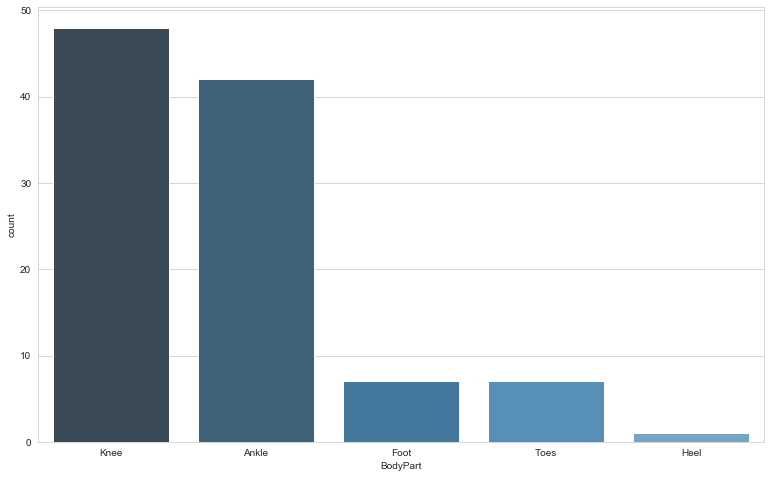

In [7]:
f,ax=plt.subplots(figsize=(13,8))
sns.countplot(iRecord['BodyPart'],palette=sns.color_palette("Blues_d"))

In [8]:
#Knee and Ankle is more prone to get injured than other lower limb body parts.

Text(0, 0.5, 'Count')

<Figure size 864x720 with 0 Axes>

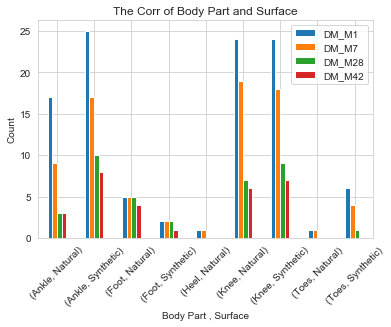

In [9]:
plt.figure(figsize = (12, 10))
ax1 = iRecord.groupby(['BodyPart', 'Surface'])['DM_M1','DM_M7', 'DM_M28', 'DM_M42'].sum().plot.bar()
plt.title('The Corr of Body Part and Surface')
plt.xlabel('Body Part , Surface')
plt.xticks(rotation = 45)
plt.ylabel('Count')

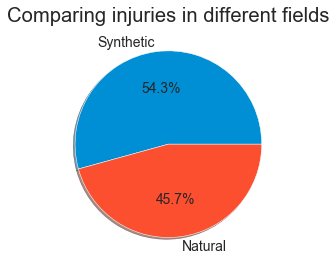

In [10]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
iRecord['Surface'].value_counts().plot.pie(autopct='%.1f%%',
                                              shadow=True)
plt.title('Comparing injuries in different fields')
plt.ylabel('')
plt.show()

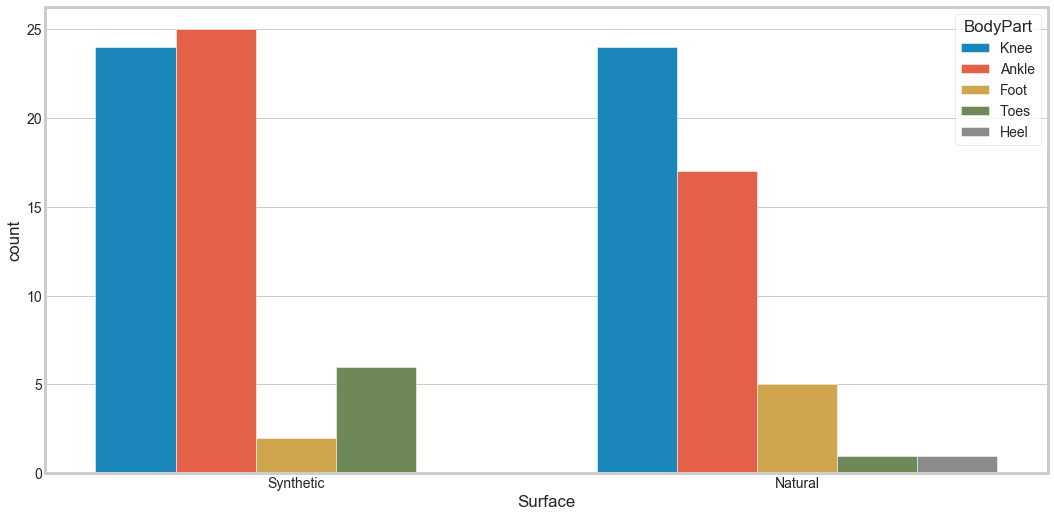

In [11]:
f,ax=plt.subplots(figsize=(16,8))
sns.countplot(x=iRecord['Surface'],hue=iRecord['BodyPart'])

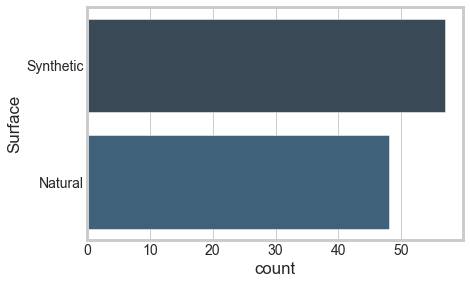

In [12]:
sns.countplot(y=iRecord['Surface'],palette=sns.color_palette("Blues_d"))

In [13]:
#Synthetic surface causes more injuries than natural surface. But the difference is not much.

<Figure size 864x720 with 0 Axes>

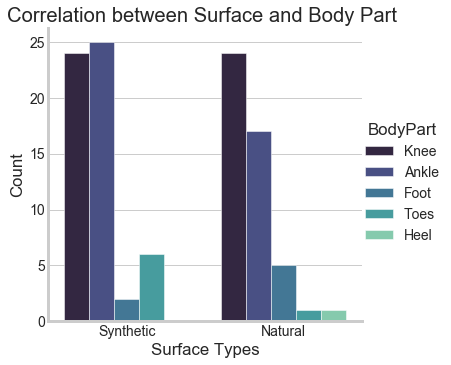

In [14]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax2 = sns.catplot(x = 'Surface', hue = 'BodyPart', kind = 'count', data = iRecord, palette = 'mako')
ax2.set(title = 'Correlation between Surface and Body Part ', xlabel = 'Surface Types', ylabel = 'Count')

In [15]:
iRecord['injury_type']=iRecord[['DM_M1','DM_M7','DM_M28','DM_M42']].sum(axis=1)
def change_vals(i):
    if i==1:
        return 'Light Injury'
    elif i==2:
        return 'Medium Injury'
    elif i==3:
        return 'Almost Serious Injury'
    else:
        return 'Serious Injury'
iRecord['injury_type']=iRecord['injury_type'].apply(change_vals)

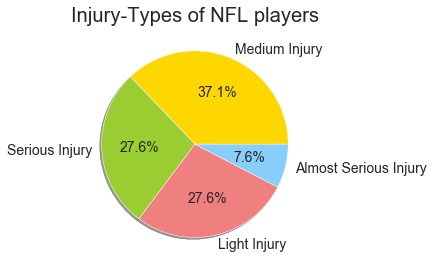

In [16]:
iRecord['injury_type'].value_counts(normalize=True).plot.pie(autopct='%.1f%%',
                                                                shadow=True,
                                                               colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Injury-Types of NFL players')
plt.ylabel('')
plt.show()

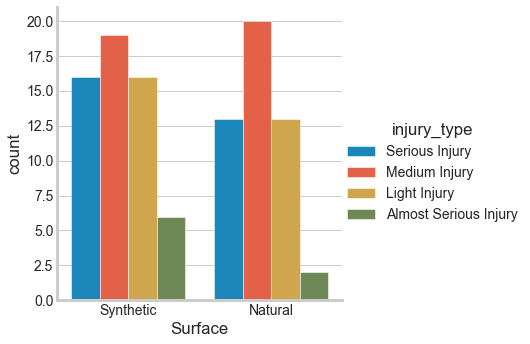

In [17]:
sns.catplot(x="Surface", data=iRecord,hue='injury_type', kind="count")

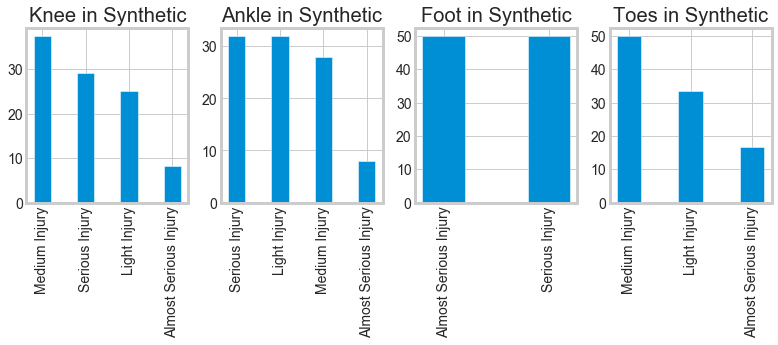

In [18]:
body_part=iRecord['BodyPart'].unique().tolist()
fig=plt.figure(figsize=(15,3))
for i in range(len(body_part)-1):
    ax=fig.add_subplot(1,5,i+1)
    c=iRecord[(iRecord['BodyPart']==body_part[i])&(iRecord['Surface']=='Synthetic')]['injury_type'].value_counts(normalize=True)*100
    c_lst=c.tolist()
    ax.bar(c.index,c_lst,width=0.4)
    ax.set_title('{} in Synthetic'.format(body_part[i]))
    ax.set_ylabel('')
    xlabels=[i for i in c.index]
    ax.set_xticklabels(xlabels, rotation=90)
plt.show()

<Figure size 864x720 with 0 Axes>

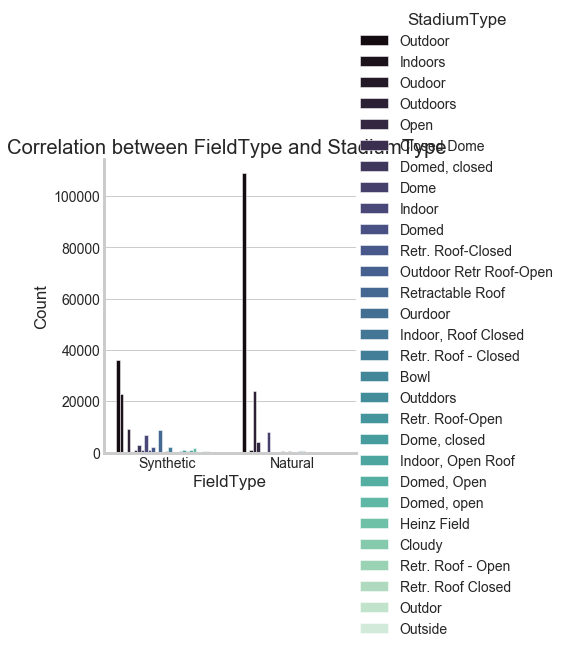

In [19]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax3 = sns.catplot(x = 'FieldType', hue = 'StadiumType', kind = 'count', data = pList, palette = 'mako')
ax3.set(title = 'Correlation between FieldType and StadiumType ', xlabel = 'FieldType', ylabel = 'Count')

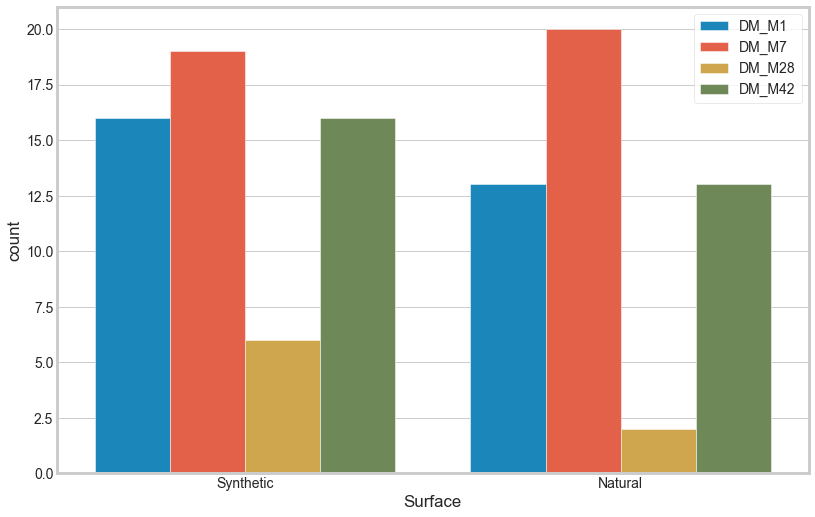

In [20]:
d = iRecord.iloc[:,5:]

d=d.sum(axis=1)
d.sort_values(inplace=True)
d.replace(1,'DM_M1',inplace=True)
d.replace(2,'DM_M7',inplace=True)
d.replace(3,'DM_M28',inplace=True)
d.replace(4,'DM_M42',inplace=True)

f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x=iRecord['Surface'],hue=d)

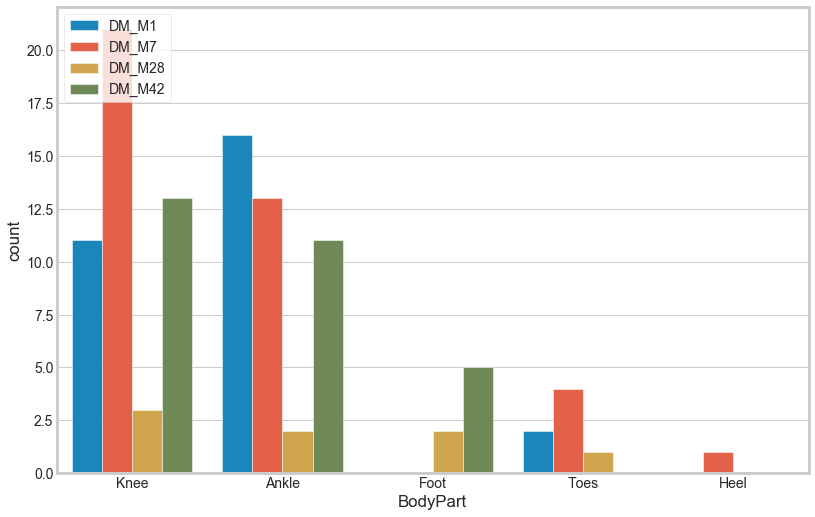

In [21]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x=iRecord['BodyPart'],hue=d)

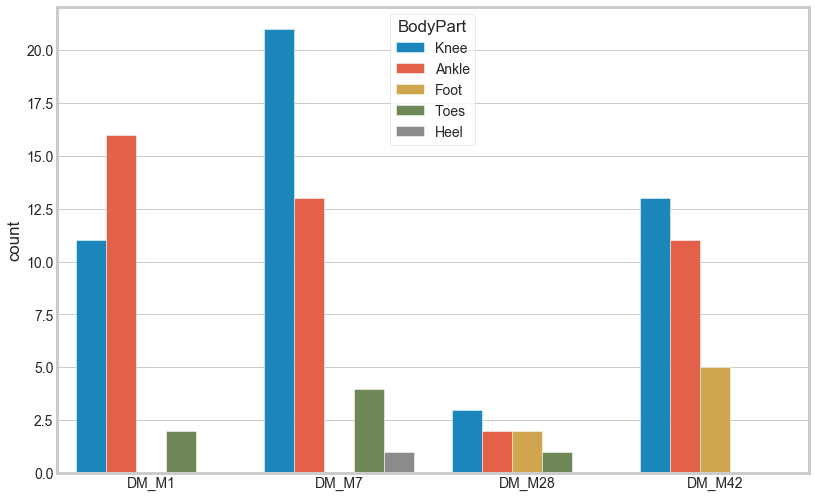

In [22]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x=d,hue=iRecord['BodyPart'])

In [23]:
#Knee and Ankle injury occur most often
#Synthetic surface is more prone to injury
#Synthetic turf causes more severe injuries compared to Natural turf
#Knee and Ankle injuries can be minor or severe. where as Foot injury is moslty severe and takes longer time to heal in all the cases.


<Figure size 864x720 with 0 Axes>

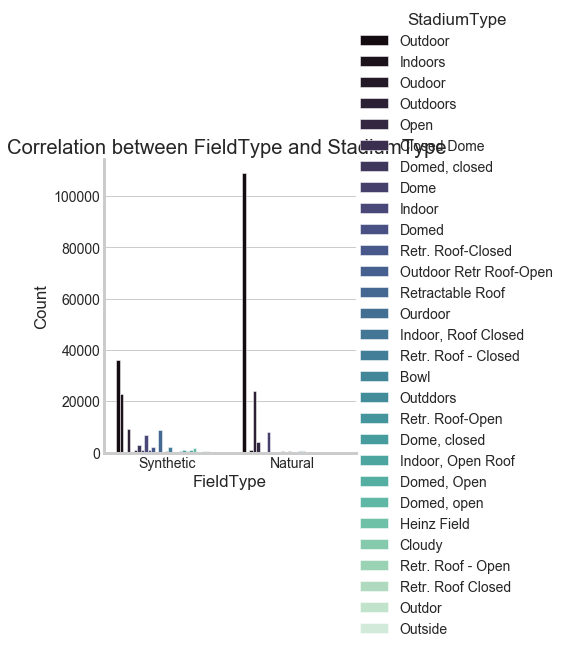

In [24]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax3 = sns.catplot(x = 'FieldType', hue = 'StadiumType', kind = 'count', data = pList, palette = 'mako')
ax3.set(title = 'Correlation between FieldType and StadiumType ', xlabel = 'FieldType', ylabel = 'Count')

<Figure size 3960x5760 with 0 Axes>

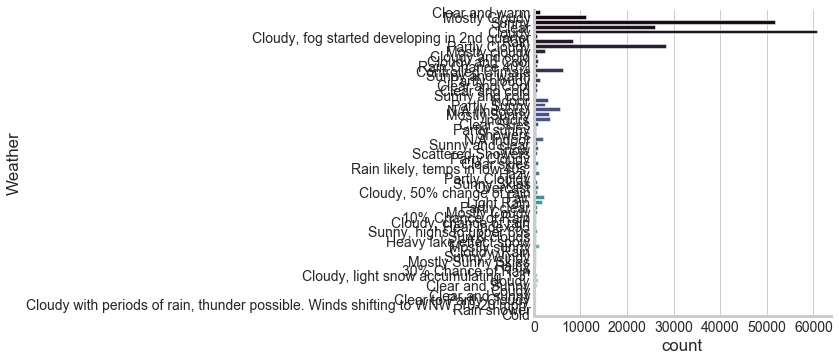

In [25]:
plt.figure(figsize=(55, 80))
sns.set_style('whitegrid')
ax4 = sns.catplot(y = 'Weather', kind = 'count', data = pList, palette = 'mako')
plt.show()

In [26]:
def groupingStadiumType(data):
    """
    grouped the stadiumType to the indoor or outdoor.
    Params: data
    Return: indoor and outdoor
    """
    if data in ['Outdoor', 'Oudoor', 'Outdoors', 'Open', 'Outdoor Retr Roof-Open', 'Ourdoor', 'Outddors', 'Retr. Roof-Open', 'Open Roof', 'Domed, Open', 'Domed, open', 'Heinz Field', 
                'Cloudy', 'Retr. Roof - Open', 'Outdor', 'Outside']:
        value = 'outdoor'
    else:
        value = 'indoor'
    return value

In [27]:
pList['groupedStadiumType'] = pList['StadiumType'].apply(groupingStadiumType)
pList['groupedStadiumType'].value_counts().to_frame()

groupedStadiumType
outdoor              189822
indoor                77183

<Figure size 1080x720 with 0 Axes>

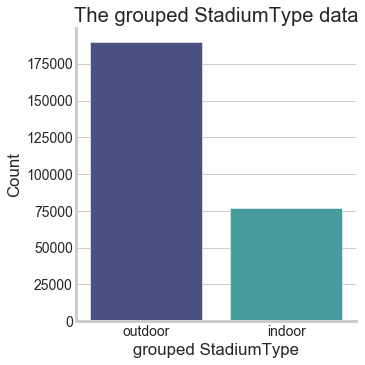

In [28]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
ax5 = sns.catplot(x = 'groupedStadiumType', kind = 'count', data = pList, palette = 'mako')
ax5.set(title = 'The grouped StadiumType data', xlabel = 'grouped StadiumType', ylabel = 'Count')
plt.show()


<Figure size 1080x720 with 0 Axes>

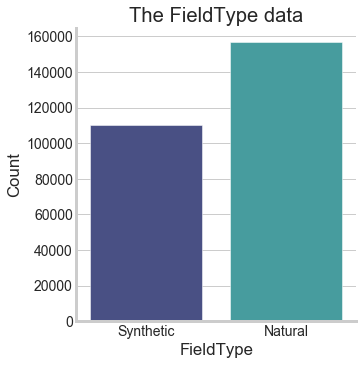

In [29]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
ax5 = sns.catplot(x = 'FieldType', kind = 'count', data = pList, palette = 'mako')
ax5.set(title = 'The FieldType data', xlabel = 'FieldType', ylabel = 'Count')
plt.show()


<Figure size 864x720 with 0 Axes>

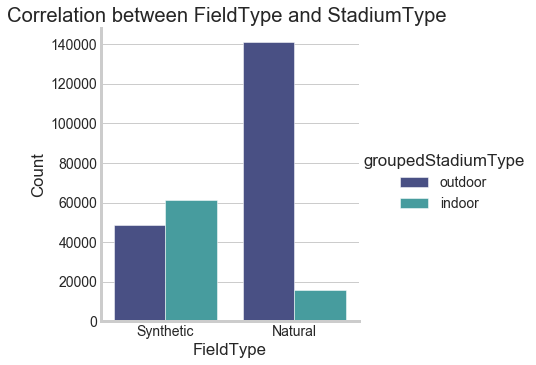

In [30]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax3 = sns.catplot(x = 'FieldType', hue = 'groupedStadiumType', kind = 'count', data = pList, palette = 'mako')
ax3.set(title = 'Correlation between FieldType and StadiumType ', xlabel = 'FieldType', ylabel = 'Count')

[Text(0.5, 1.0, 'The tempeature of the Field Type and StadiumType')]

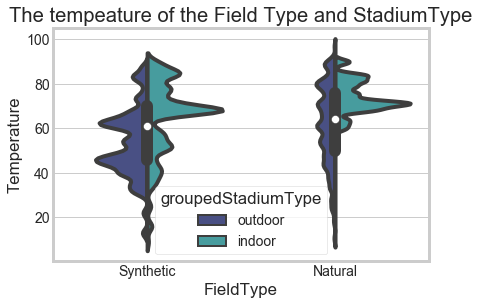

In [31]:

sns.set_style('whitegrid')

ax6 = sns.violinplot(x = 'FieldType', y = 'Temperature', hue = 'groupedStadiumType', split = True, data = pList.loc[pList['Temperature'] > -500], palette = 'mako')
ax6.set(title = 'The tempeature of the Field Type and StadiumType')

In [32]:
def clean_weather(row):
    cloudy = ['Cloudy 50% change of rain', 'Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
          'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
          'Mostly cloudy', 'Rain Chance 40%',' Partly cloudy', 'Party Cloudy',
          'Rain likely, temps in low 40s', 'Partly Clouidy', 'Cloudy, 50% change of rain','Mostly Coudy', '10% Chance of Rain',
          'Cloudy, chance of rain', '30% Chance of Rain', 'Cloudy, light snow accumulating 1-3"',
          'cloudy', 'Coudy', 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy fog started developing in 2nd quarter', 'Cloudy light snow accumulating 1-3"',
         'Cloudywith periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy 50% change of rain', 'Cloudy and cold',
       'Cloudy and Cool', 'Partly cloudy']
    
    clear = ['Clear, Windy',' Clear to Cloudy', 'Clear, highs to upper 80s',
             'Clear and clear','Partly sunny',
             'Clear, Windy', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny', 'Clear Skies',
             'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s', 'Sun & clouds', 'Mostly sunny','Sunny, Windy',
             'Mostly Sunny Skies', 'Clear and Sunny', 'Clear and sunny','Clear to Partly Cloudy', 'Clear Skies',
            'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold', 'Sunny and warm', 'Sunny and clear']
    
    rainy = ['Rainy', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain', 'Rain shower', 'Rain likely, temps in low 40s.', 'Cloudy, Rain']
    
    snow = ['Heavy lake effect snow']
    
    indoor = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']
        
    if row.Weather in cloudy:
        return 'Cloudy'
    
    if row.Weather in indoor:
        return 'Indoor'
    
    if row.Weather in clear:
        return 'Clear'
    
    if row.Weather in rainy:
        return 'Rain'
    
    if row.Weather in snow:
        return 'Snow'
      
    if row.Weather in ['Cloudy.', 'Heat Index 95', 'Cold']:
        return np.nan
    
    return row.Weather

In [33]:
def clean_play_df(play_df):
    play_df_cleaned = play_df.copy()
    
    # clean Weather
    play_df_cleaned['Weather'] = play_df_cleaned.apply(lambda row: clean_weather(row), axis=1)
    
    return play_df_cleaned

In [34]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

    
def visualize_game_features(game_df, rotation = 90, add_labels = False, figsize=(10,10)):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(4, 3, hspace=0.2, wspace=0.2)
    weather_ax = fig.add_subplot(grid[0, 0:])
    temperature_ax = fig.add_subplot(grid[1, 0:])
    temperature_box_ax = fig.add_subplot(grid[2, 0:])
    
    weather_ax.bar(game_df.Weather.value_counts().keys(), game_df.Weather.value_counts().values, color='#00c2c7')
    weather_ax.set_title('Weather')
    weather_ax.set_xticklabels(game_df.Weather.value_counts().keys(), rotation=rotation)
    
    if add_labels:
        add_value_labels(weather_ax, spacing=5)
        
    temperature_ax.hist(game_df.Temperature.astype(int).values, bins=30, range=(0,90))
    temperature_ax.set_xlim(0,110)
    temperature_ax.set_xticks(range(0,110,10))
    temperature_ax.set_xticklabels(range(0,110,10))
    temperature_ax.set_title('Temperature')
    
    temperature_box_ax.boxplot(game_df.Temperature.astype(int).values, vert=False)
    temperature_box_ax.set_xlim(0,110)
    temperature_box_ax.set_xticks(range(0,110,10))
    temperature_box_ax.set_xticklabels(range(0,110,10))
    temperature_box_ax.set_yticklabels(['Temperature'])

    plt.suptitle('Game-Level Exploration', fontsize=16)
    plt.show()

In [35]:
play_df_cleaned = clean_play_df(pList)

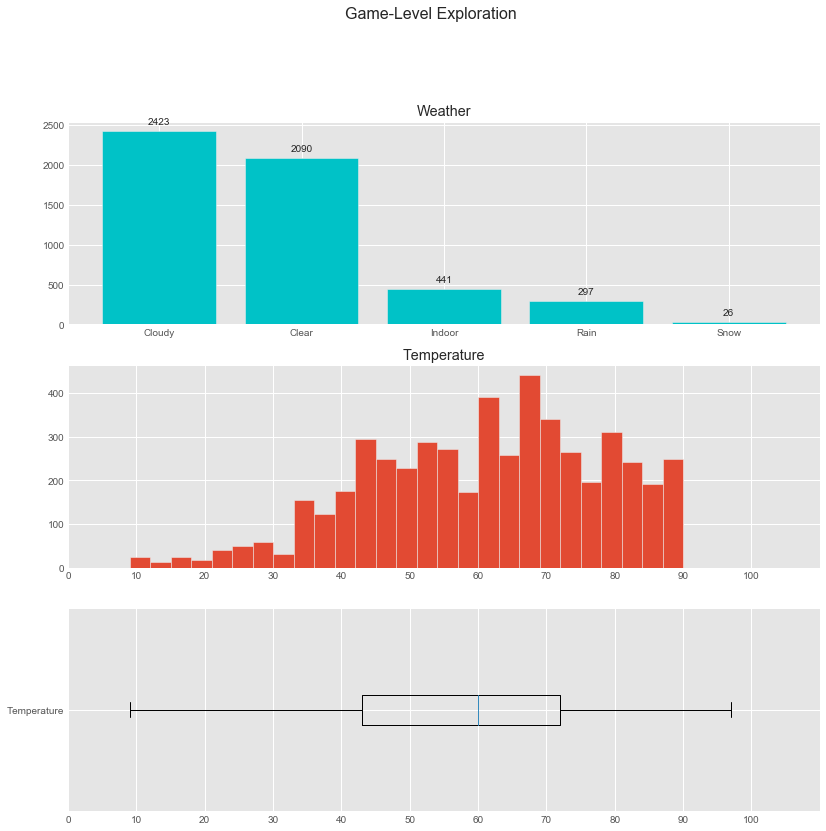

In [36]:
game_df_cleaned = play_df_cleaned[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']].drop_duplicates().reset_index().drop(columns=['index'])
visualize_game_features(game_df_cleaned, rotation=0, add_labels = True, figsize=(12,16))

In [37]:
#The majority of the games are played outdoors. That's why weather should be importsant.
#Synthetic turf is very common, but there are around 30% more games with natural turf.
#The temperature and other weather conditions vary greately. It will be interesting to look how the temperature affects the injuries.

In [38]:
dataToPlot = pList.groupby(['RosterPosition', 'PlayType', 'PlayerKey'])['PlayerDay'].count().reset_index()

<Figure size 3024x720 with 0 Axes>

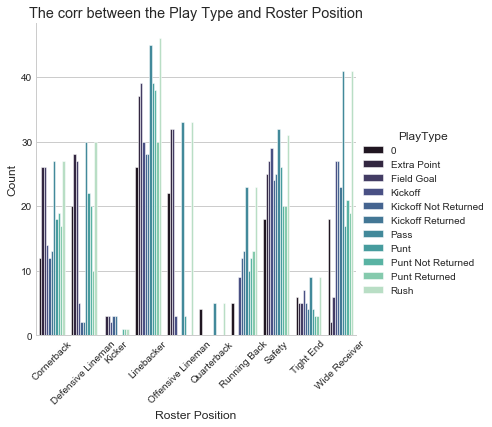

In [39]:
plt.figure(figsize = (42, 10))

sns.set_style('whitegrid')
ax7 = sns.catplot(x = 'RosterPosition', hue = 'PlayType', data = dataToPlot, kind = 'count', palette = 'mako')
ax7.set(title = 'The corr between the Play Type and Roster Position', xlabel = 'Roster Position', ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

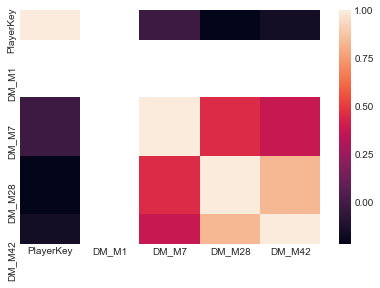

In [40]:
sns.heatmap(iRecord.corr())

In [41]:
player_data_df = play_df_cleaned[['PlayerKey', 'RosterPosition', 'PlayerGamePlay', 'Position', 'PositionGroup']]

In [42]:
def visualize_player_features(player_df, figsize=(25,20), add_labels=False):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    
    grid = plt.GridSpec(3, 4, hspace=0.2, wspace=0.2)
    
    plays_ax = fig.add_subplot(grid[0, 0:2])
    max_rolling_plays_ax = fig.add_subplot(grid[1, 0:2])
    
    rosterposition_ax = fig.add_subplot(grid[0, 2:])
    positiongroup_ax = fig.add_subplot(grid[1, 2:])
    position_ax = fig.add_subplot(grid[2, 0:])
    
    plays_ax.hist(player_df.groupby(by=['PlayerKey']).count()['RosterPosition'].values, bins=20, color='#00c2c7')
    plays_ax.set_title('Number of plays per player')
    
    max_rolling_plays_ax.hist(player_df.groupby(by=['PlayerKey']).PlayerGamePlay.max().values, bins=20, color='#00c2c7')
    max_rolling_plays_ax.set_title('Maximum number of rolling plays per player')
    
    rosterposition_ax.bar(player_df.RosterPosition.value_counts().keys().values, player_df.RosterPosition.value_counts().values)
    rosterposition_ax.set_xticklabels(player_df.RosterPosition.value_counts().keys().values, rotation=20)
    rosterposition_ax.set_title('Roster Position')
    if add_labels:
        add_value_labels(rosterposition_ax, spacing=5)
    
    position_ax.bar(player_df.Position.value_counts().keys().values, player_df.Position.value_counts().values, color='#ff9e15')
    position_ax.set_title('Position')
    if add_labels:
        add_value_labels(position_ax, spacing=5)
        
    positiongroup_ax.bar(player_df.PositionGroup.value_counts().keys().values, player_df.PositionGroup.value_counts().values)
    positiongroup_ax.set_title('Position Group')
    if add_labels:
        add_value_labels(positiongroup_ax, spacing=5)
        
    plt.suptitle('Player-Level Exploration', fontsize=16)
    plt.show()

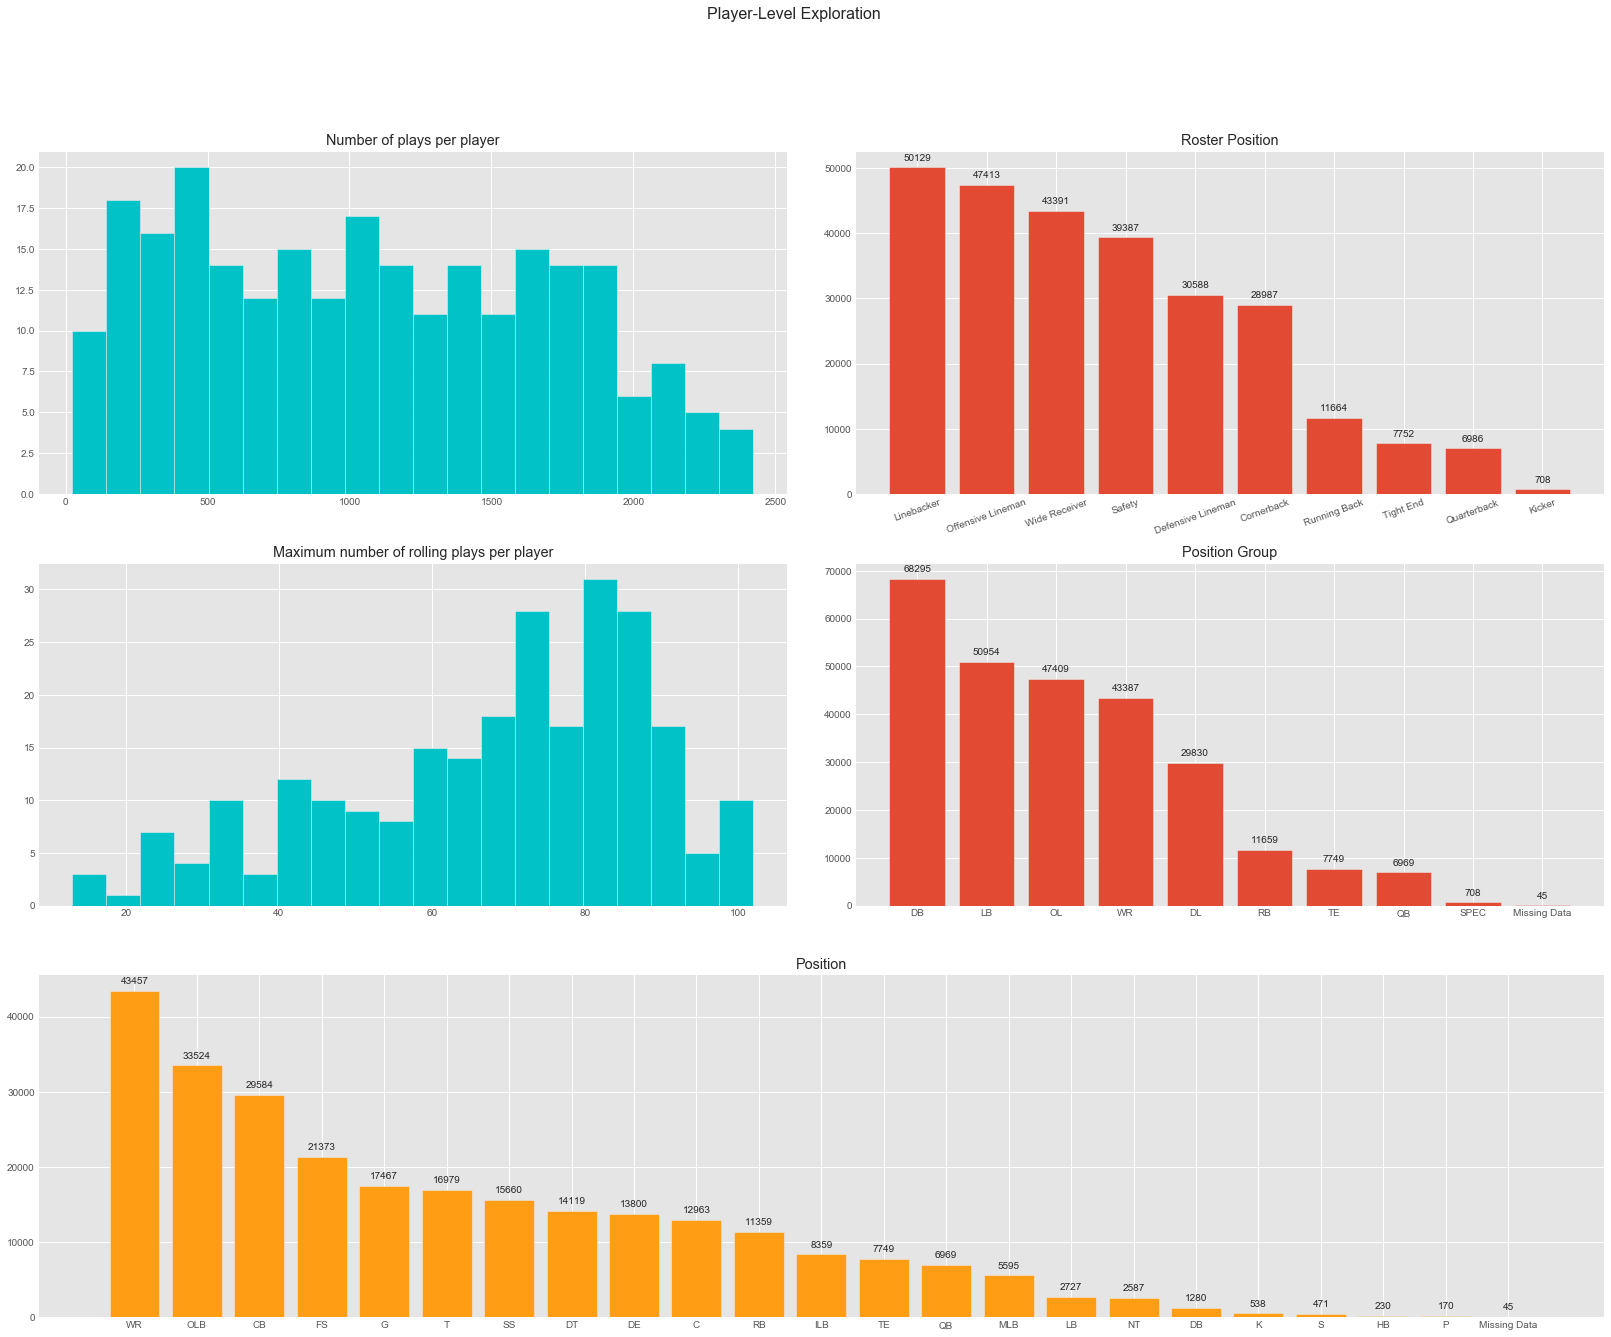

In [43]:
visualize_player_features(player_data_df, add_labels=True)

The diagrams above show that the circumstances around the players vary greately: some players do much more games than the others, there is a lot of different playing position. All these factors can contribute to injuries.

In [44]:
def visualize_play(play_df_cleaned):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    
    plt.bar(play_df_cleaned.PlayType.value_counts().keys().values, play_df_cleaned.PlayType.value_counts().values)
    plt.xticks(range(len(play_df_cleaned.PlayType.value_counts().keys().values)), play_df_cleaned.PlayType.value_counts().keys().values, rotation=20)
    add_value_labels(ax, spacing=5)
    plt.title('Play-Level Exploration: PlayType', fontsize=16)
    
    plt.show()

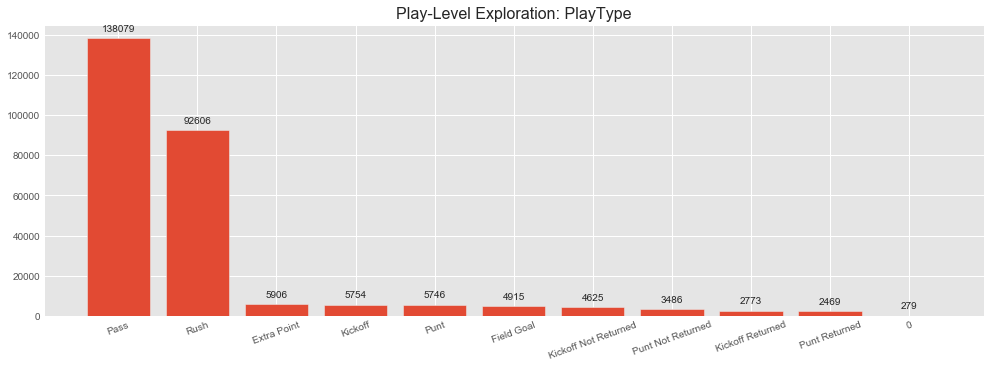

In [45]:
visualize_play(play_df_cleaned)

In [46]:
def get_position(player_df, playkey, time):
    '''
    Helper function to get the player position at a certain time
    '''
    row = player_df[(player_df['PlayKey']==playkey) & (player_df['time']==time)]
    event = row['event'].values[0]
    x = row['x'].values[0]
    y = row['y'].values[0]
    direction = row['dir'].values[0]
    distance = row['dis'].values[0]
    orientation = row['o'].values[0]
    speed = row['s'].values[0]
    
    return event, x, y, direction, distance, orientation, speed

def visualize_player_position(player_df, playkey, time, figsize=(24,10)):
    '''
    Helper function to visualize a single player position.
    '''
    
    event, x, y, direction, distance, orientation, speed = get_position(player_df, playkey, time)
    
    background = Image.open(path + 'nfl_coordinates.png')
    background = background.resize((1200,533))
    
    # show background
    fig = plt.figure(figsize=figsize)
    plt.imshow(np.array(background).transpose(0,1,2), origin='lower')
    
    # show orientation
    dx = 5
    dy = dx*np.tan(np.radians(90 + orientation))
    plt.arrow(x*10,y*10,dx,dy, color = '#767676', width=5)
    plt.plot(x*10,y*10,color = '#767676', label='orientation')

    # show speed
    dx = speed*20
    dy = dx*np.tan(np.radians(90 + direction))
    plt.arrow(x*10,y*10,dx,dy, color = '#004c97', width=5)
    plt.plot(x*10,y*10, color = '#004c97', label='speed')
    
    # show current player position
    plt.scatter(x*10,y*10,s=200,color='#e01e5a',marker='x')
    plt.annotate('({x:.1f},{y:.1f})'.format(x=x,y=y), (x*10, y*10), xytext=(x*10,y*10-30), color='#e01e5a')
    
    plt.xticks(range(0,1200,100), range(0,120,10))
    plt.yticks(range(0,533,100), range(0,53,10))
    
    plt.title('{play}:{time} {event}'.format(play=playkey, time=time, event = event))
    
    plt.legend()
    plt.show()

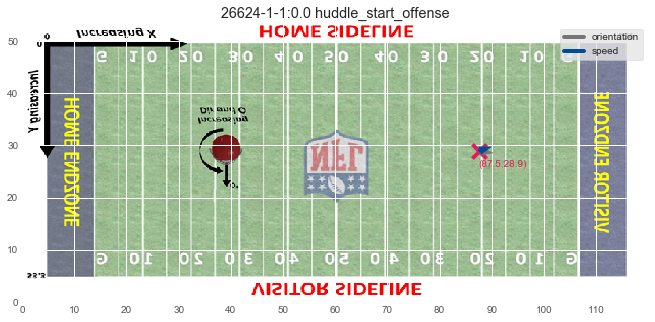

In [47]:
visualize_player_position(trk, '26624-1-1', 0.0, figsize=(10,5))

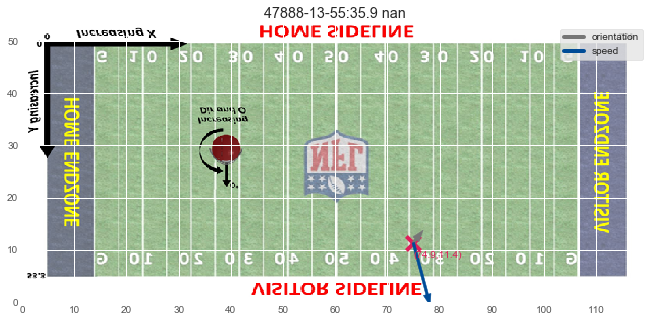

In [48]:
visualize_player_position(trk, '47888-13-55', 35.9, figsize=(10,5))

In [49]:
def visualize_player_track(player_df, playkey, figsize=(24,10), max_positions = 5):
    '''
    Helper function to visualize the whole path of the player
    '''
    # get timestamps per player
    timestamps = player_df[player_df['PlayKey'] == playkey].time.unique()
    
    background = Image.open(path + 'nfl_coordinates.png')
    background = background.resize((1200,533))
    
    # show background
    fig = plt.figure(figsize=figsize)
    plt.imshow(np.array(background).transpose(0,1,2), origin='lower')
    
    # iterate through timestamps
    positions_x, positions_y = [], []
    for i in range(0, len(timestamps), len(timestamps) // max_positions):
        time = timestamps[i]
        # get position and orientation
        event, x, y, direction, distance, orientation, speed = get_position(player_df, playkey, time)
    
        positions_x.append(x*10)
        positions_y.append(y*10)
        
        # plot orientation and speed for the lasi point
        if (len(timestamps) - i < len(timestamps) // max_positions):
            # show orientation
            dx = 5
            dy = dx*np.tan(np.radians(90 + orientation))
            plt.arrow(x*10,y*10,dx,dy, color = '#767676', width=5)
            plt.plot(x*10,y*10,color = '#767676', label='orientation')

            # show speed
            dx = speed*20
            dy = dx*np.tan(np.radians(90 + direction))
            plt.arrow(x*10,y*10,dx,dy, color = '#004c97', width=5)
            plt.plot(x*10,y*10, color = '#004c97', label='speed')
            
            # add x-marker and annotation only for the last position
            plt.scatter(x*10,y*10,s=200,color='#e01e5a',marker='x')
            plt.annotate('({x:.1f},{y:.1f})'.format(x=x,y=y), (x*10, y*10), xytext=(x*10,y*10-30), color='#e01e5a')
            
    # show player's path
    plt.scatter(positions_x,positions_y,s=50,color='#e01e5a',marker='o')
    plt.plot(positions_x,positions_y,color='#e01e5a', label='player path', linestyle='--')
    
    # creat custom tick labels
    plt.xticks(range(0,1200,100), range(0,120,10))
    plt.yticks(range(0,533,100), range(0,53,10))
    
    # add title
    plt.title('{play}'.format(play=playkey))
    
    plt.legend()
    plt.show()

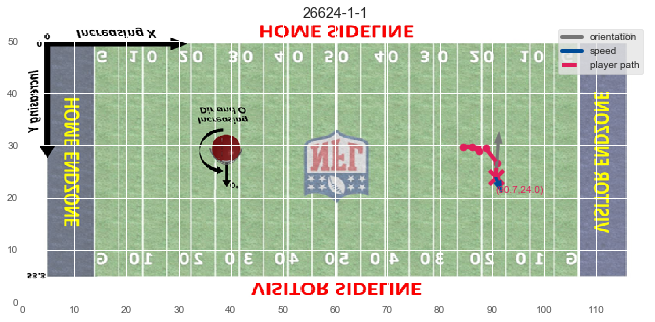

In [50]:
visualize_player_track(trk, '26624-1-1', max_positions = 5, figsize=(10,5))

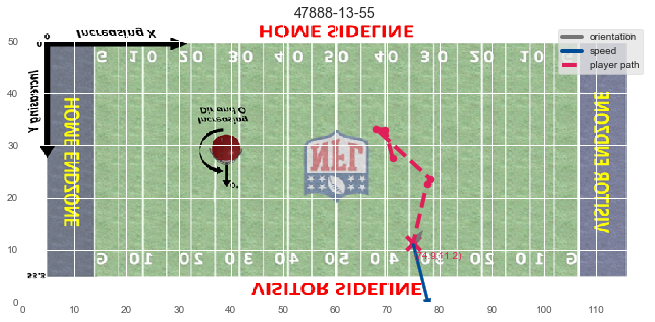

In [51]:
visualize_player_track(trk, '47888-13-55', max_positions = 5, figsize=(10,5))

In [52]:
def visualize_field_heatmap(player_df, xbins=13, ybins=6, annotate = False):
    # create a grid
    x = np.linspace(0, 120, xbins)
    y = np.linspace(0, 53, ybins)
    
    # initialize heatmap
    hmap = np.zeros((xbins,ybins))
    
    for i in range(xbins-1):
        for j in range(ybins-1):
            hmap[i,j] = len(player_df[(player_df.x >= x[i]) & (player_df.x <= x[i+1]) & (player_df.y >= y[j]) & (player_df.y <= y[j+1])])
            
    fig = plt.figure(figsize=(10,5))
    ax = sns.heatmap(np.transpose(hmap), annot=annotate, fmt = '.0f')
    plt.title('Field Heatmap \n the most visited areas of the field are highlighted')
    plt.show()


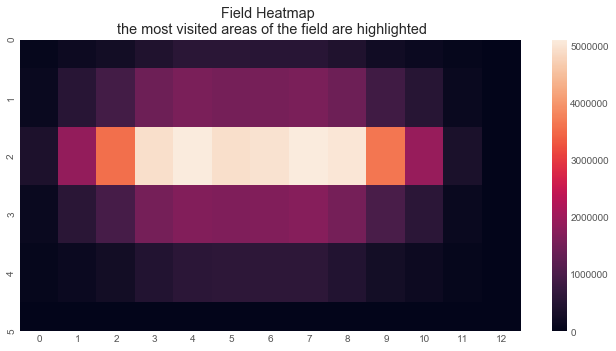

In [53]:
visualize_field_heatmap(trk)

# Data Merge 

In [54]:
#                 how='left')
injury_games_play = iRecord.merge(pList,
                  on='PlayKey',
                  how='left')
injury_games_play.shape

(105, 24)

In [55]:
injury_games_play.isnull().sum()

PlayerKey_x            0
GameID_x               0
PlayKey               28
BodyPart               0
Surface                0
DM_M1                  0
DM_M7                  0
DM_M28                 0
DM_M42                 0
injury_type            0
PlayerKey_y           28
GameID_y              28
RosterPosition        28
PlayerDay             28
PlayerGame            28
StadiumType           32
FieldType             28
Temperature           28
Weather               31
PlayType              28
PlayerGamePlay        28
Position              28
PositionGroup         28
groupedStadiumType    28
dtype: int64

In [56]:
injury_games_play.dropna(subset=['Weather'], inplace=True)

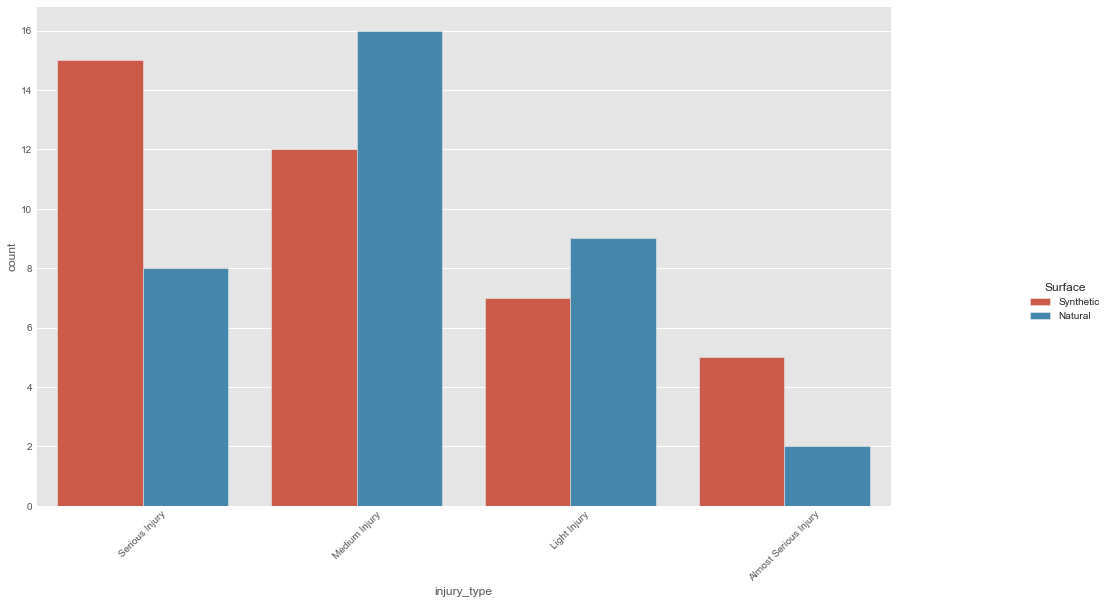

In [57]:
chart = sns.catplot(x="injury_type", hue='Surface', data=injury_games_play, kind="count")

chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(16, 8)

In [58]:
from collections import Counter
cold=0;warm=0
for i in list(Counter(injury_games_play.Weather.values).keys()):
    if 'cloud' in i.replace('','').lower():
        cold+=Counter(injury_games_play.Weather.values)[i]
    else:
        warm+=Counter(injury_games_play.Weather.values)[i]
cold,warm        

(30, 44)

## Injury and Play Visualization 

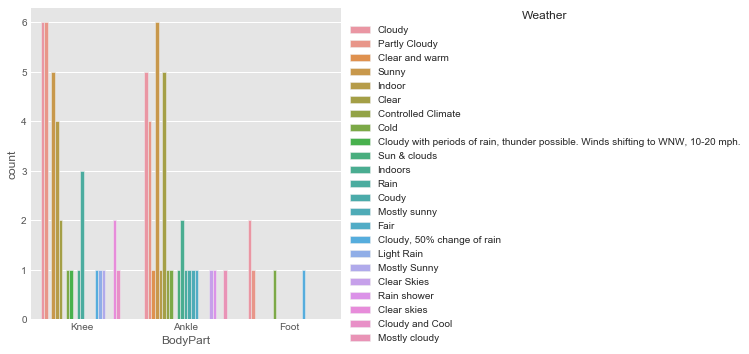

In [59]:
sns.catplot(x="BodyPart", hue='Weather', data=injury_games_play, kind="count")

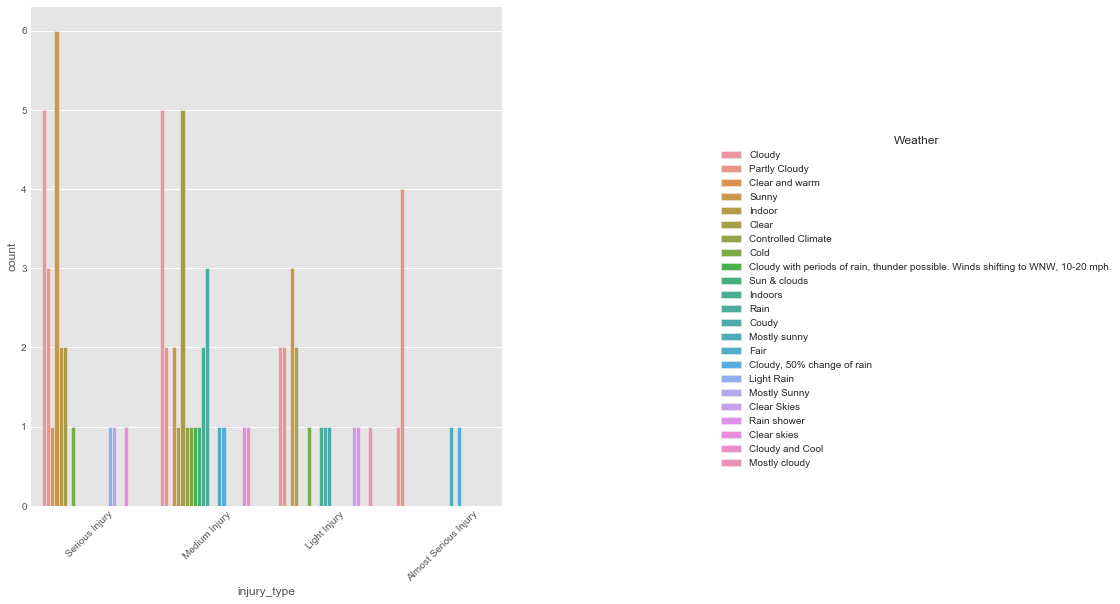

In [60]:
chart = sns.catplot(x="injury_type", hue='Weather', data=injury_games_play, kind="count")

chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(16, 8)

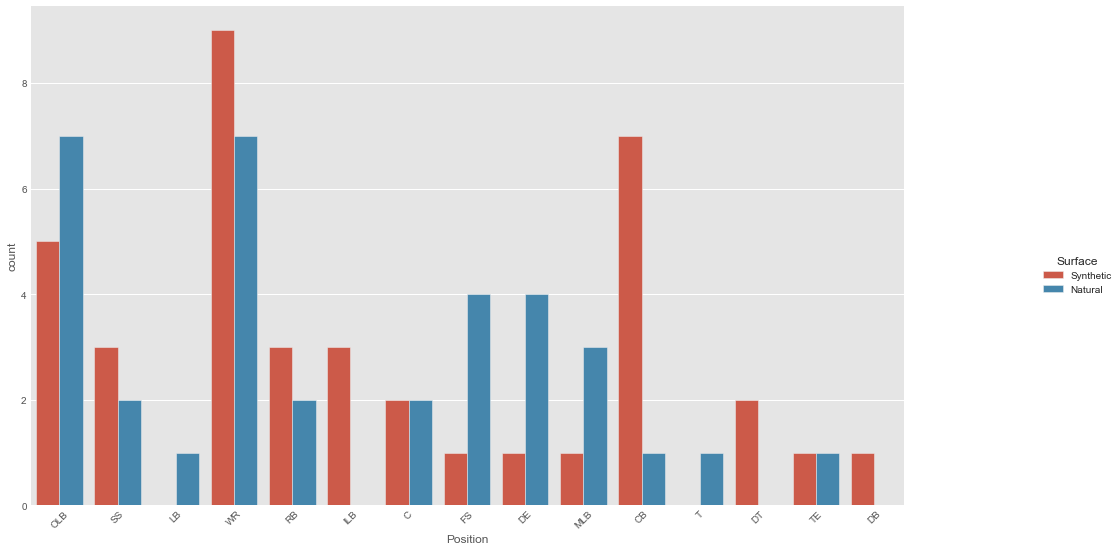

In [61]:
chart = sns.catplot(x="Position", hue='Surface', data=injury_games_play, kind="count")

chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(16, 8)

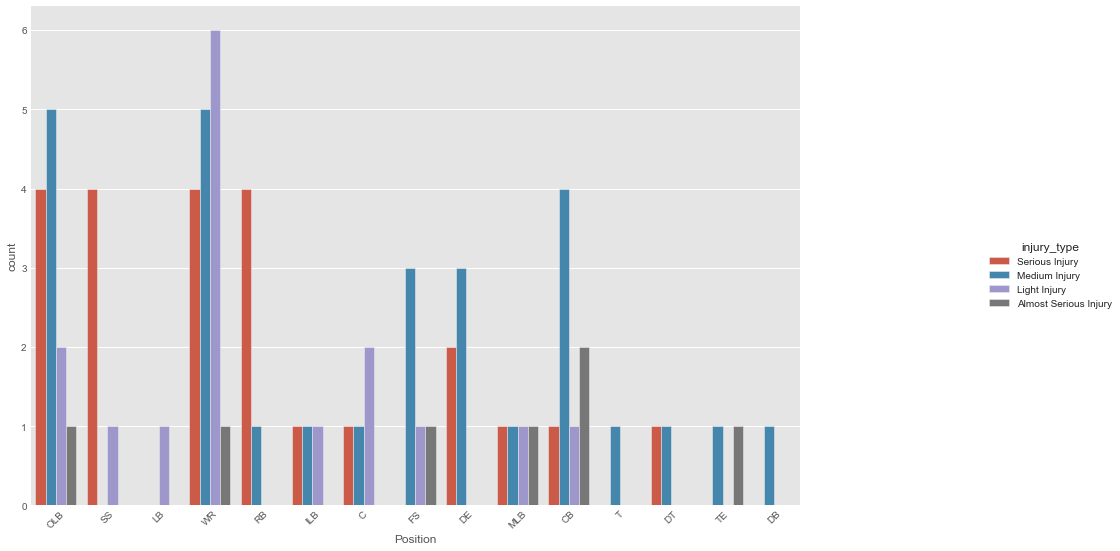

In [62]:
chart = sns.catplot(x="Position", hue='injury_type', data=injury_games_play, kind="count")

chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(16, 8)

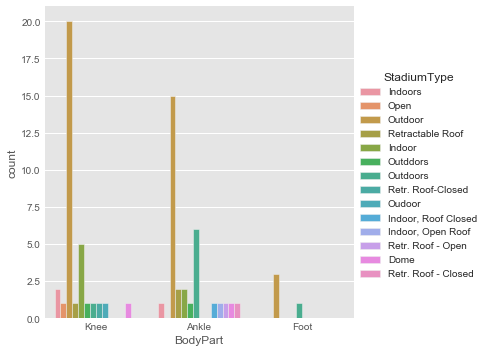

In [63]:
injury_games_play = injury_games_play[pd.notnull(injury_games_play['PlayKey'])]
sns.catplot(x="BodyPart", hue='StadiumType', data=injury_games_play, kind="count")


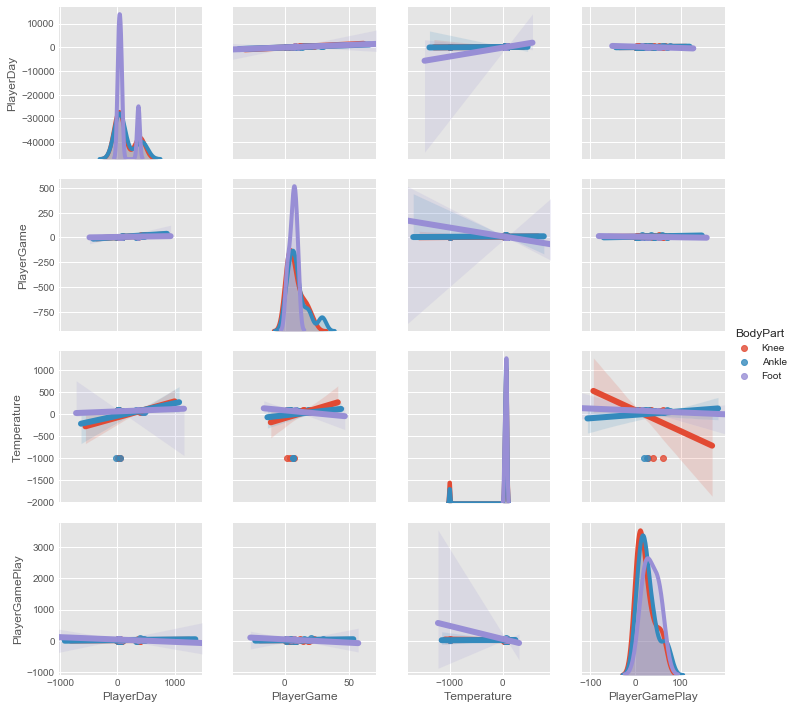

In [64]:
data=injury_games_play[['BodyPart', 'Surface', 'RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position',
       'PositionGroup']]

ax = sns.pairplot(data, hue='BodyPart', kind="reg")

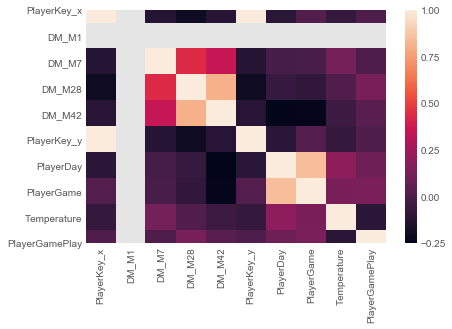

In [65]:
sns.heatmap(injury_games_play.corr())

In [66]:
# joined cleaned games dataset and injury dataset
game_injury_df = iRecord.set_index('GameID').join(game_df_cleaned.set_index('GameID'), how = 'outer')

In [67]:
game_injury_df.columns

Index(['PlayerKey', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1', 'DM_M7',
       'DM_M28', 'DM_M42', 'injury_type', 'StadiumType', 'FieldType',
       'Weather', 'Temperature'],
      dtype='object')

In [68]:
# fill null values for the injury columns with zeros
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)

game_injury_df.DM_M1 = game_injury_df.DM_M1 - game_injury_df.DM_M7
game_injury_df.DM_M7 = game_injury_df.DM_M7 - game_injury_df.DM_M28
game_injury_df.DM_M28 = game_injury_df.DM_M28 - game_injury_df.DM_M42

# introduce a column with a flag indicating an injury
game_injury_df['Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7'] + game_injury_df['DM_M28'] + game_injury_df['DM_M42']

In [69]:
# drop duplicated surface column
game_injury_df = game_injury_df.drop(columns=['Surface'])

# drop play-level features just for now
game_injury_df = game_injury_df.drop(columns=['PlayerKey', 'PlayKey'])

# create dummy variables
game_injury_df_dummies = pd.get_dummies(game_injury_df, dummy_na = True, drop_first = True).drop(columns=['FieldType_nan'])

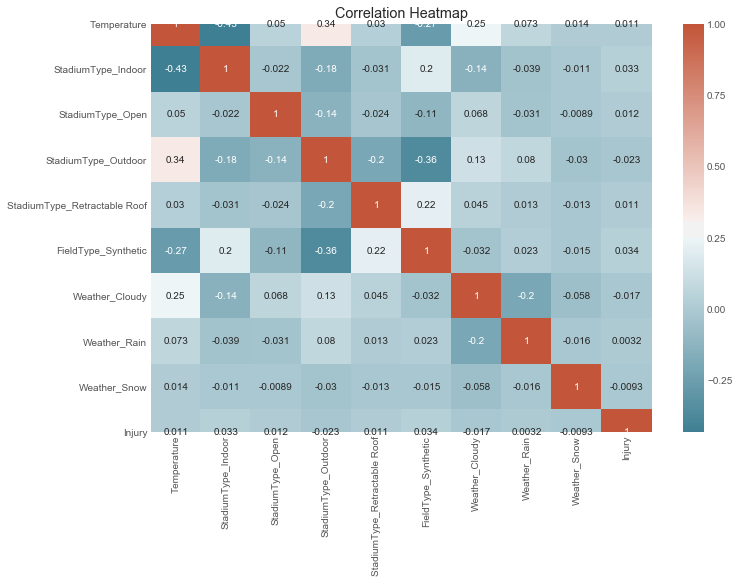

In [70]:
corr_df = game_injury_df_dummies[['Temperature', 'StadiumType_Indoor', 'StadiumType_Open', 'StadiumType_Outdoor', 'StadiumType_Retractable Roof',
                                 'FieldType_Synthetic', 'Weather_Cloudy', 'Weather_Rain', 'Weather_Snow', 'Injury']].corr()

fig = plt.figure(figsize=(10,7))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

In [71]:
import scipy.stats as ss

# Source:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [72]:
import itertools    

# https://stackoverflow.com/questions/51859894/how-to-plot-a-cramer-s-v-heatmap-for-categorical-features
def plot_cramers_v_heatmap(df, cols):
    corrM = np.zeros((len(cols),len(cols)))

    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]).as_matrix())
        corrM[idx2, idx1] = corrM[idx1, idx2]

    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    fig, ax = plt.subplots(figsize=(7, 6))
    ax = sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax); ax.set_title("Cramer V Correlation between Variables");

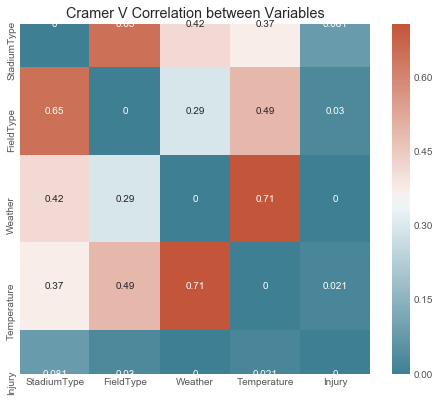

In [73]:
cols = ["StadiumType", "FieldType", "Weather", "Temperature", "Injury"]
plot_cramers_v_heatmap(game_injury_df, cols)

In [74]:
import math

def conditional_entropy(x, y, nan_strategy='replace', nan_replace_value=0):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples with missing values, or 'replace'
        to replace all missing values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'.
    """
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [75]:
def plot_theils_u_heatmap(df, cols):
    corrM = np.zeros((len(cols),len(cols)))

    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = theils_u(df[col1].values, df[col2].values)
        corrM[idx2, idx1] = corrM[idx1, idx2]

    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    fig, ax = plt.subplots(figsize=(7, 6))
    ax = sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax); ax.set_title("Theil's U Correlation between Variables");

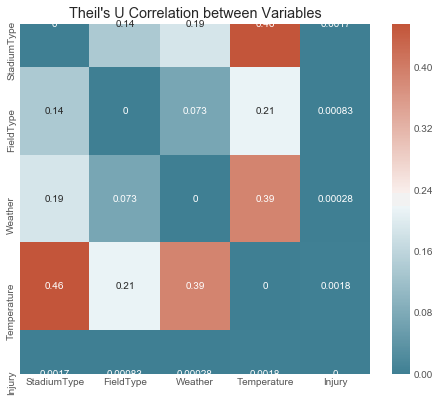

In [76]:
cols = ["StadiumType", "FieldType", "Weather", "Temperature", "Injury"]
plot_theils_u_heatmap(game_injury_df, cols)

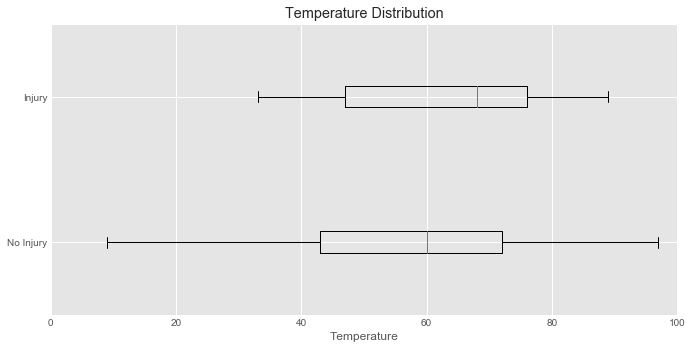

In [77]:
fig = plt.figure(figsize=(10,5))
plt.boxplot([game_injury_df[game_injury_df.Injury == 0].Temperature.values, game_injury_df[game_injury_df.Injury == 1].Temperature.values], vert = False)
plt.title('Temperature Distribution')
plt.yticks([1,2], ['No Injury', 'Injury'])
plt.xlim(0,100)
plt.xlabel('Temperature')
plt.show()

In [78]:
# joined cleaned games dataset and injury dataset
play_injury_df = iRecord.dropna(subset=['PlayKey']).set_index('PlayKey').join(play_df_cleaned.set_index('PlayKey'), how = 'outer', lsuffix='_left', rsuffix='_right')

# fill null values for the injury columns with zeros
play_injury_df['DM_M1'] = play_injury_df['DM_M1'].fillna(0).astype(int)
play_injury_df['DM_M7'] = play_injury_df['DM_M7'].fillna(0).astype(int)
play_injury_df['DM_M28'] = play_injury_df['DM_M28'].fillna(0).astype(int)
play_injury_df['DM_M42'] = play_injury_df['DM_M42'].fillna(0).astype(int)

# introduce a column with a flag indicating an injury
play_injury_df.DM_M1 = play_injury_df.DM_M1 - play_injury_df.DM_M7
play_injury_df.DM_M7 = play_injury_df.DM_M7 - play_injury_df.DM_M28
play_injury_df.DM_M28 = play_injury_df.DM_M28 - play_injury_df.DM_M42

play_injury_df['Injury'] = play_injury_df['DM_M1'] + play_injury_df['DM_M7'] + play_injury_df['DM_M28']+ play_injury_df['DM_M42']

# drop duplicated surface column
play_injury_df = play_injury_df.drop(columns=['Surface'])

# create dummy variables
play_injury_df_dummies = pd.get_dummies(play_injury_df, columns = ['PlayType', 'PositionGroup'], dummy_na = True, drop_first = True)

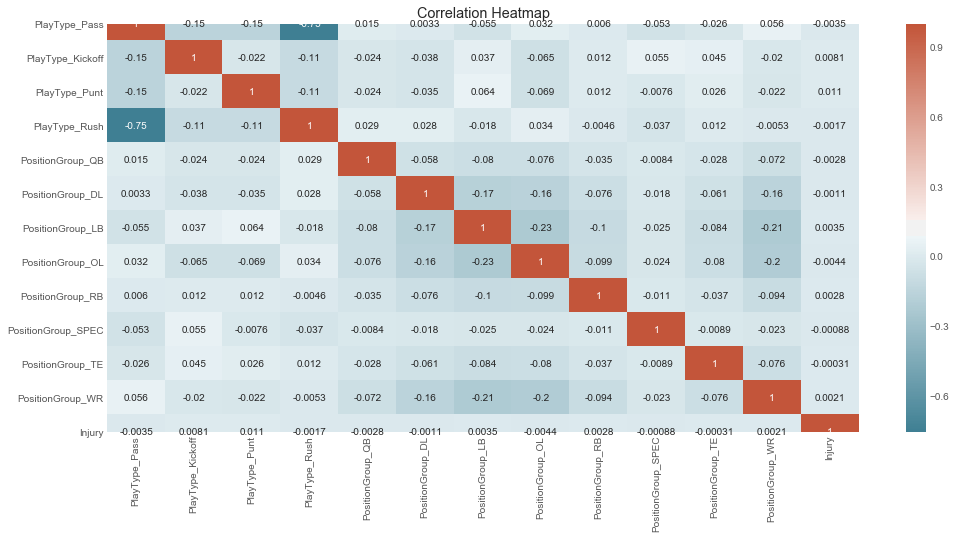

In [79]:
corr_df = play_injury_df_dummies[['PlayType_Pass', 'PlayType_Kickoff', 'PlayType_Punt', 'PlayType_Rush',
                                  'PositionGroup_QB', 'PositionGroup_DL', 'PositionGroup_LB', 'PositionGroup_OL',
                                  'PositionGroup_RB', 'PositionGroup_SPEC', 'PositionGroup_TE', 'PositionGroup_WR',
                                  'Injury']].corr()

fig = plt.figure(figsize=(15,7))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

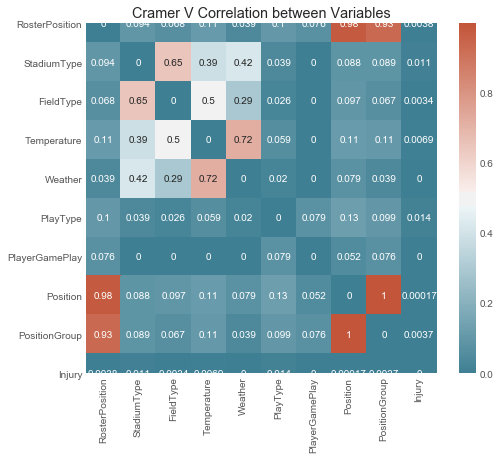

In [80]:
cols = ["RosterPosition", "StadiumType", "FieldType", "Temperature", "Weather", 'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup', 'Injury']
plot_cramers_v_heatmap(play_injury_df, cols)

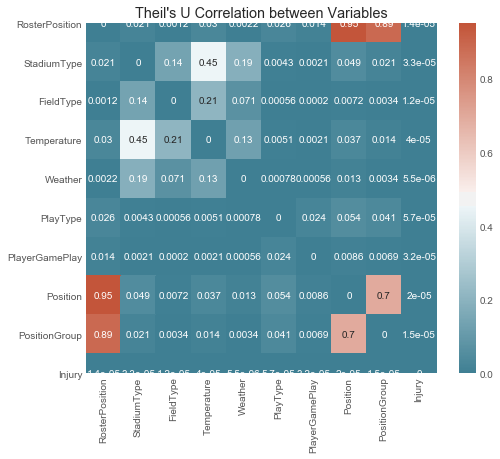

In [81]:
plot_theils_u_heatmap(play_injury_df, cols)

## Injury, Play and Game Visualization 

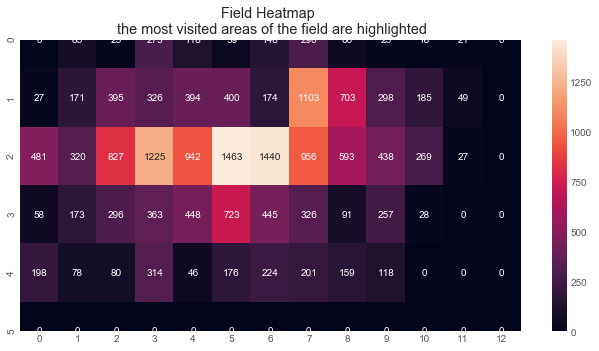

In [82]:
# find the keys of the plays related to injuries
play_injuries = play_injury_df.reset_index().dropna()[['PlayKey']]
# merge the playkeys associated with injuries with players' positions
player_injuries = trk.merge(play_injuries, on='PlayKey', how='inner') # use inner join!
# visualize the heatmap
visualize_field_heatmap(player_injuries, annotate = True)

It looks like the heatmap of injuries is somewhat different from the general heatmap of the field! This may mean that there are more dangerous areas on the field, where players are more likely to get injured!

We can use this insight for the feature engineering for the injury prediction model!

In [83]:
def player_games_timeline(player_key, play_df, injury_df):
    '''
    Function to plot the player's timeline
    '''
    player_games = play_df[play_df.PlayerKey == player_key][['GameID', 'PlayKey', 'PlayerDay', 'PlayerGame']]
    
    # plot timeline for the player
    plt.figure(figsize=(20,5))
    plt.title('Player Games Timeline \n PlayerKey: ' + str(player_key))  
    plt.plot(player_games.PlayerDay.unique(), np.zeros(len(player_games.PlayerDay.unique())), color='#00c2c7')
    plt.scatter(player_games.PlayerDay.unique(), np.zeros(len(player_games.PlayerDay.unique())), s=100, color='#00c2c7', label='games')
    
    # add games with injury
    injured_players = injury_df.PlayerKey.unique()
    if player_key in injured_players:
        injury_games = injury_df[injury_df.PlayerKey == player_key].GameID.values
        injury_days = player_games[player_games.GameID.isin(injury_games)].PlayerDay.unique()
        
        plt.scatter(injury_days, np.zeros(len(injury_days)), s=100, color='#e01e5a', label='injury')
    
    plt.legend()
    plt.xlabel('days')
    plt.yticks([])
    plt.show()

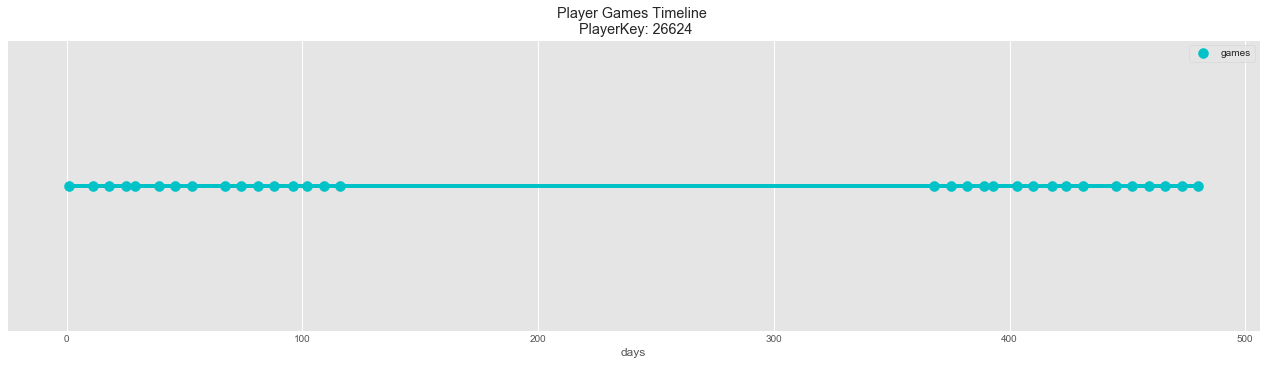

In [84]:
player_games_timeline(26624, pList, iRecord)

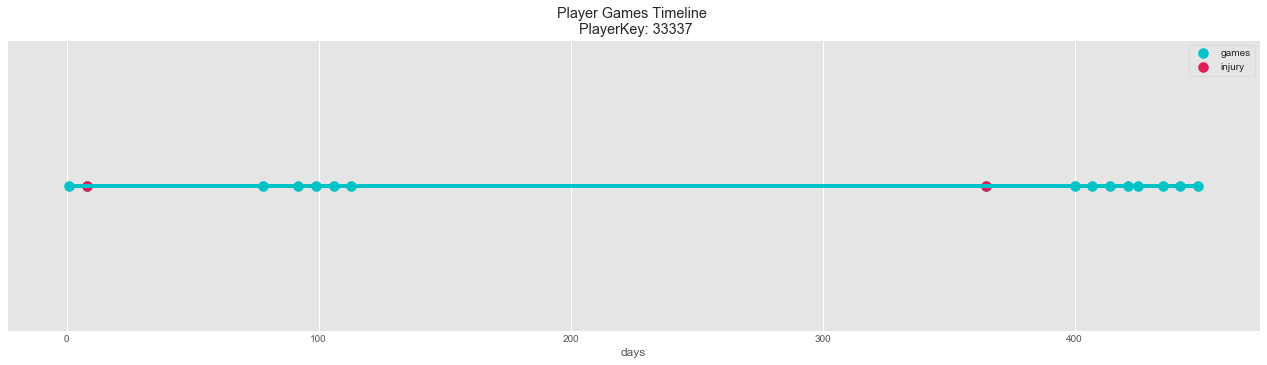

In [85]:
player_games_timeline(33337, pList, iRecord)

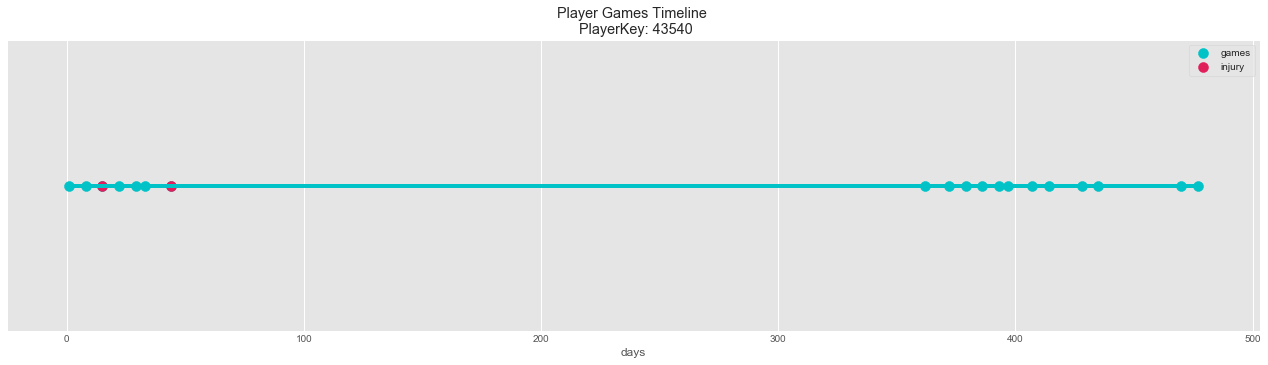

In [86]:
player_games_timeline(43540, pList, iRecord)

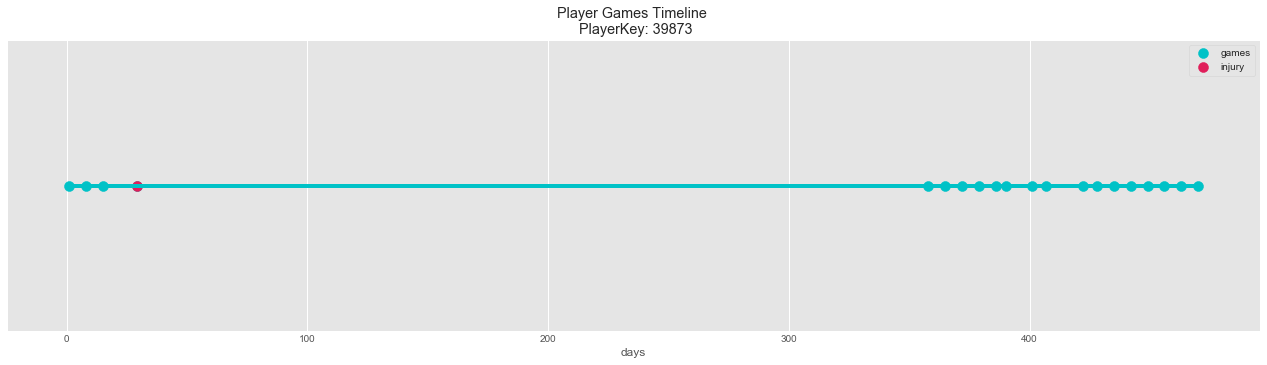

In [87]:
player_games_timeline(39873, pList, iRecord)

It seems that injuries happen in the beginning of the season (for each individual player). This might be another interesting thing to check.

So is the speed of the player, his position on the field and the number of the game (PlayerGame) correlated with the injury?

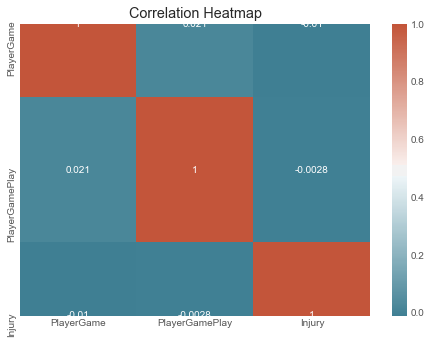

In [88]:
play_injury = play_injury_df[['PlayerGame', 'PlayerGamePlay', 'Injury']]
corrs = play_injury.corr()

fig = plt.figure(figsize=(7,5))
sns.heatmap(corrs, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning 

In [89]:
# reset index 
features_df = play_injury_df.copy().reset_index()
# drop the irrelevant columns
features_df = features_df.drop(columns=['PlayerKey_left','GameID_left','BodyPart', 'PlayKey', 'PlayerKey_right', 'GameID_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'])
# convert into dummies
features_df = pd.get_dummies(features_df, dummy_na = False, drop_first = True)

In [90]:
# split into X and y
y = features_df['Injury']
X = features_df.drop(columns=['Injury'])

Use stratified split to split into train and test set so that class labels will be evenly distributed among the train and the test set:

In [91]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.values[train_index, :], X.values[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

The number of plays with injury is so tiny, that we can't just use the data as is. Our model will just always predict no injury. That is why we need to resample our dataset. Resampling will help us to generate more examples of cases from the rare class (the injury), so we can train our model! I will use imbalanced-learn library.

In [92]:
#!pip3 install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE

res = RandomOverSampler(random_state=0)
X_resampled, y_resampled = res.fit_resample(X_train, y_train)

In [93]:
X_train

array([[ 1,  1, 63, ...,  0,  0,  1],
       [ 1,  1, 63, ...,  0,  0,  1],
       [ 1,  1, 63, ...,  0,  0,  1],
       ...,
       [32,  5, 89, ...,  0,  1,  0],
       [15,  3, 89, ...,  0,  0,  1],
       [44,  7, 70, ...,  0,  0,  1]], dtype=int64)

In [94]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
161836    1
162448    1
165798    1
167734    1
167889    1
Name: Injury, Length: 133503, dtype: int32

In [95]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=3,
                      learning_rate=0.1,
                      n_estimators=100,
                      objective='binary:logistic',
                      booster='gbtree',
                      tree_method='auto',
                      n_jobs=50,
                      gamma=0,
                      min_child_weight=1,
                      max_delta_step=0,
                      subsample=1,
                      colsample_bytree=1,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      reg_alpha=0,
                      reg_lambda=1,
                      scale_pos_weight=1,
                      base_score=0.5,
                      random_state=42)
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=50,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy))
print('Cohen kappa: {}'.format(cohen_kappa))
print('Confusion Matrix: \n {}'.format(conf_matrix))

Accuracy: 0.9959476566069676
Cohen kappa: 0.11984357627108178
Confusion Matrix: 
 [[132925    539]
 [     2     37]]


In [97]:
# extract the feature importances from XGBoost model
feature_importances = model.feature_importances_
feature_importances = pd.DataFrame(feature_importances, index = X.columns).reset_index().rename(columns={'index':'feature', 0:'importance'}).sort_values(by=['importance'], ascending=False)

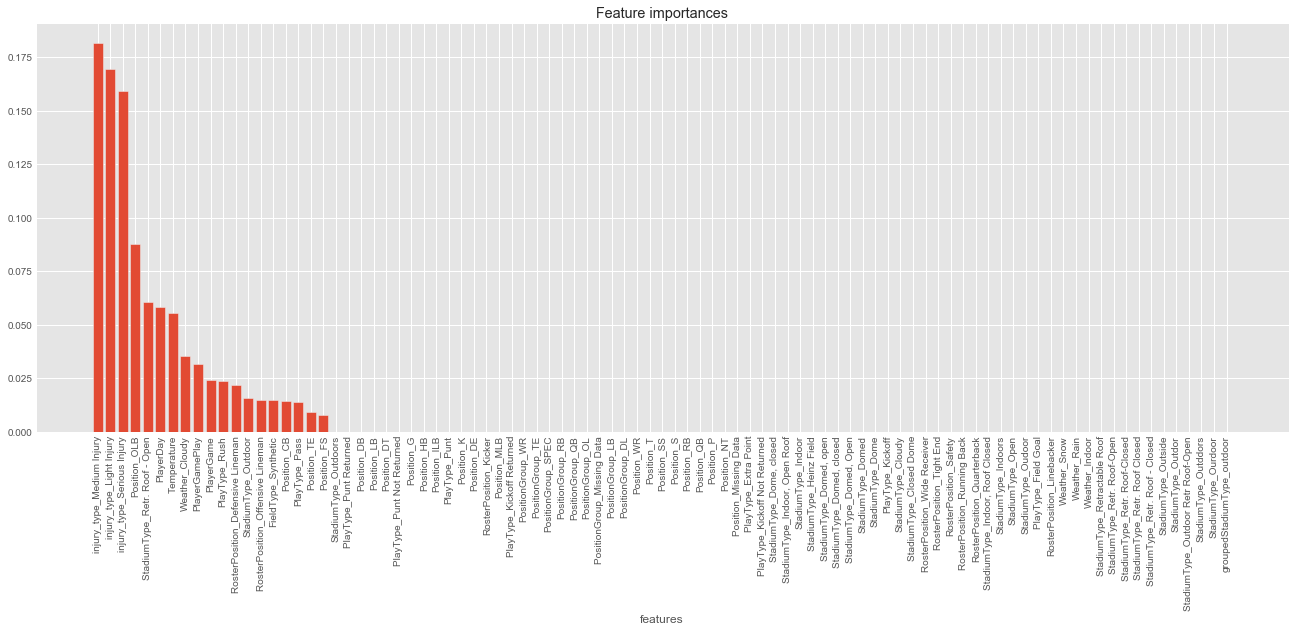

In [98]:
# plot as a bar chart
plt.figure(figsize=(20,7))
plt.bar(range(len(feature_importances)), feature_importances.importance.values)
plt.xticks(range(len(feature_importances)), feature_importances.feature.values, rotation=90)

plt.title('Feature importances')
plt.xlabel('features')
plt.show()

Weather and stadium type are possibly important factors impacting injury;
Field type feature is not among the important features in our injury predicting model;
Player day and player game are actually important! This alignes with our observations of the players' timelines above!

In [99]:
def create_motion_data_df(injury_df, play_df, player_df):
    '''
    Function to create aggregated values for motion data.
    '''
    # create a field with the angle between direction and orientation
    player_df['angle'] = player_df['o'] - player_df['dir']
    
    # greate grouped dataframes
    grouped_max = player_df[['PlayKey','time', 'dir', 'dis', 'o', 's', 'speed', 'angle']].groupby(by=['PlayKey']).max()
    grouped_average = player_df[['PlayKey','time', 'dir', 'dis', 'o', 's', 'speed', 'angle']].groupby(by=['PlayKey']).mean()
    
    # merge with play data
    play_df = play_df.merge(grouped_max.reset_index(), on=['PlayKey'])
    play_df = play_df.merge(grouped_average.reset_index(), on=['PlayKey'], suffixes=('_max', '_avg'))
    
    # merge with injury data
    injury_df = injury_df.drop(columns=['PlayerKey', 'GameID', 'BodyPart', 'Surface']).merge(play_df, on=['PlayKey'], how='outer').fillna(0)
    
    return injury_df

In [111]:
from math import sqrt
def squared(x):
    return x**2
def root(x):
    return sqrt(x)
trk['speed'] = (trk.x.diff().fillna(0).apply(squared) + trk.y.diff().fillna(0).apply(squared)).apply(root)

In [120]:
motion_df = create_motion_data_df(iRecord, pList, trk)

In [122]:
# introduce a column with a flag indicating an injury
motion_df.DM_M1 = motion_df.DM_M1 - motion_df.DM_M7
motion_df.DM_M7 = motion_df.DM_M7 - motion_df.DM_M28
motion_df.DM_M28 = motion_df.DM_M28 - motion_df.DM_M42
motion_df['Injury'] = motion_df['DM_M1'] + motion_df['DM_M7'] + motion_df['DM_M28']+ motion_df['DM_M42']

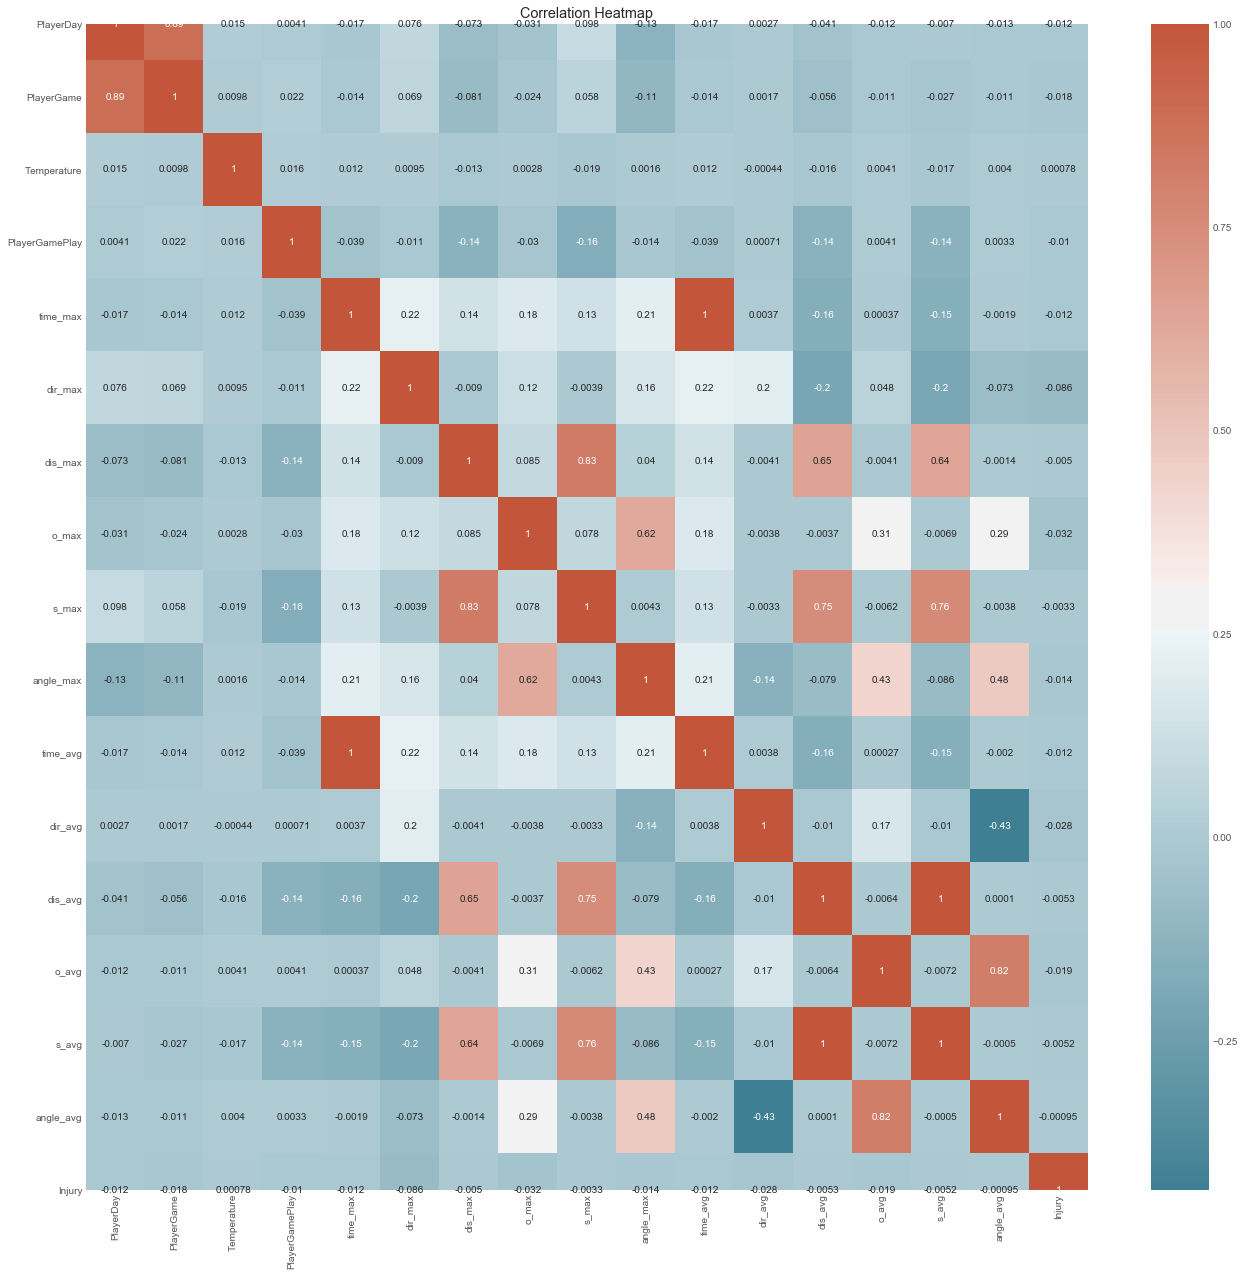

In [123]:
corr_df = motion_df[['RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position',
       'PositionGroup', 'time_max', 'dir_max', 'dis_max', 'o_max', 's_max',
       'angle_max', 'time_avg', 'dir_avg', 'dis_avg', 'o_avg', 's_avg',
       'angle_avg', 'Injury']].corr()

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

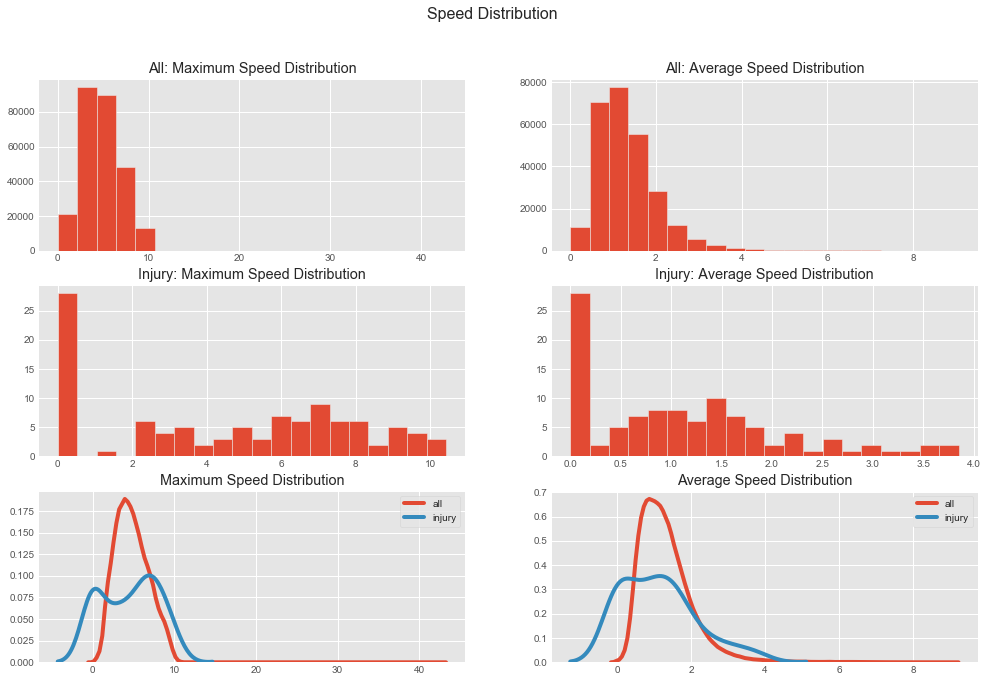

In [124]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df.s_max, bins = 20)
axs[0,0].set_title('All: Maximum Speed Distribution')

axs[1,0].hist(motion_df[motion_df.Injury == 1].s_max, bins = 20)
axs[1,0].set_title('Injury: Maximum Speed Distribution')

axs[0,1].hist(motion_df.s_avg, bins = 20)
axs[0,1].set_title('All: Average Speed Distribution')

axs[1,1].hist(motion_df[motion_df.Injury == 1].s_avg, bins = 20)
axs[1,1].set_title('Injury: Average Speed Distribution')

sns.kdeplot(motion_df.s_max, ax = axs[2,0], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].s_max,ax = axs[2,0], label='injury')
axs[2,0].set_title('Maximum Speed Distribution')

sns.kdeplot(motion_df.s_avg, ax = axs[2,1], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].s_avg,ax = axs[2,1], label='injury')
axs[2,1].set_title('Average Speed Distribution')

plt.suptitle('Speed Distribution', fontsize=16)
plt.show()

In [125]:
# compare maximum play speed samples
D, pvalue = ss.ks_2samp(motion_df.s_max, motion_df[motion_df.Injury == 1].s_max)
D, pvalue

(0.26627246458700193, 6.874925085269171e-07)

In [126]:
# compare average play speed samples
D, pvalue = ss.ks_2samp(motion_df.s_avg, motion_df[motion_df.Injury == 1].s_avg)
D, pvalue

(0.2667397212191192, 6.524733287631737e-07)

The p-value is very small, so we can reject the null hypothesis that both samples are drawn from one distribution. It means that most certainly we do have some difference between speed for normal plays and plays with injury.

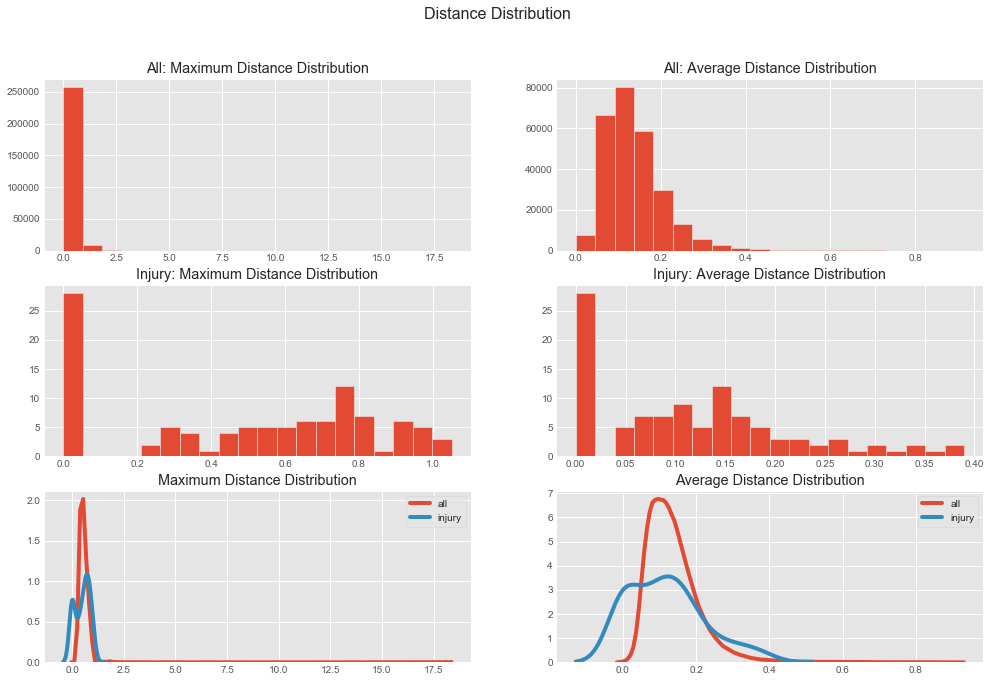

In [127]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df.dis_max, bins = 20)
axs[0,0].set_title('All: Maximum Distance Distribution')

axs[1,0].hist(motion_df[motion_df.Injury == 1].dis_max, bins = 20)
axs[1,0].set_title('Injury: Maximum Distance Distribution')

axs[0,1].hist(motion_df.dis_avg, bins = 20)
axs[0,1].set_title('All: Average Distance Distribution')

axs[1,1].hist(motion_df[motion_df.Injury == 1].dis_avg, bins = 20)
axs[1,1].set_title('Injury: Average Distance Distribution')

sns.kdeplot(motion_df.dis_max, ax = axs[2,0], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].dis_max,ax = axs[2,0], label='injury')
axs[2,0].set_title('Maximum Distance Distribution')

sns.kdeplot(motion_df.dis_avg, ax = axs[2,1], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].dis_avg,ax = axs[2,1], label='injury')
axs[2,1].set_title('Average Distance Distribution')

plt.suptitle('Distance Distribution', fontsize=16)
plt.show()

In [128]:
D, pvalue = ss.ks_2samp(motion_df.dis_max, motion_df[motion_df.Injury == 1].dis_max)
D, pvalue

(0.2664831385063305, 6.71484061020739e-07)

In [129]:
D, pvalue = ss.ks_2samp(motion_df.dis_avg, motion_df[motion_df.Injury == 1].dis_avg)
D, pvalue

(0.2664831385063305, 6.71484061020739e-07)

The p-value is very small, so we can reject the null hypothesis that both samples are drawn from one distribution. It means that most certainly we do have some difference between distance for normal plays and plays with injury.

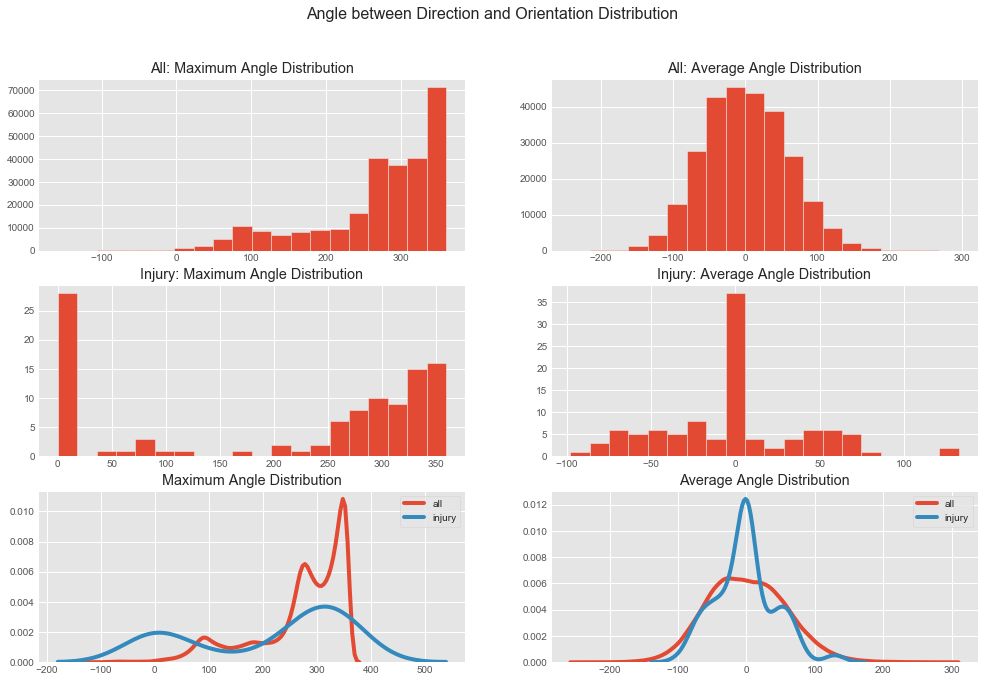

In [130]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df.angle_max, bins = 20)
axs[0,0].set_title('All: Maximum Angle Distribution')

axs[1,0].hist(motion_df[motion_df.Injury == 1].angle_max, bins = 20)
axs[1,0].set_title('Injury: Maximum Angle Distribution')

axs[0,1].hist(motion_df.angle_avg, bins = 20)
axs[0,1].set_title('All: Average Angle Distribution')

axs[1,1].hist(motion_df[motion_df.Injury == 1].angle_avg, bins = 20)
axs[1,1].set_title('Injury: Average Angle Distribution')

sns.kdeplot(motion_df.angle_max, ax = axs[2,0], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].angle_max,ax = axs[2,0], label='injury')
axs[2,0].set_title('Maximum Angle Distribution')

sns.kdeplot(motion_df.angle_avg, ax = axs[2,1], label='all')
sns.kdeplot(motion_df[motion_df.Injury == 1].angle_avg,ax = axs[2,1], label='injury')
axs[2,1].set_title('Average Angle Distribution')

plt.suptitle('Angle between Direction and Orientation Distribution', fontsize=16)
plt.show()

In [131]:
D, pvalue = ss.ks_2samp(motion_df.angle_max, motion_df[motion_df.Injury == 1].angle_max)
D, pvalue

(0.26592042582813735, 7.150693250007965e-07)

In [132]:
D, pvalue = ss.ks_2samp(motion_df.angle_avg, motion_df[motion_df.Injury == 1].angle_avg)
D, pvalue

(0.18757487601147826, 0.0012399821024162978)

We can see a little different result here: average angle distribution for all plays and for plays with injury are actually close. We can see that the p-value for these distributions is higher and the kde plots look somewhat similar.

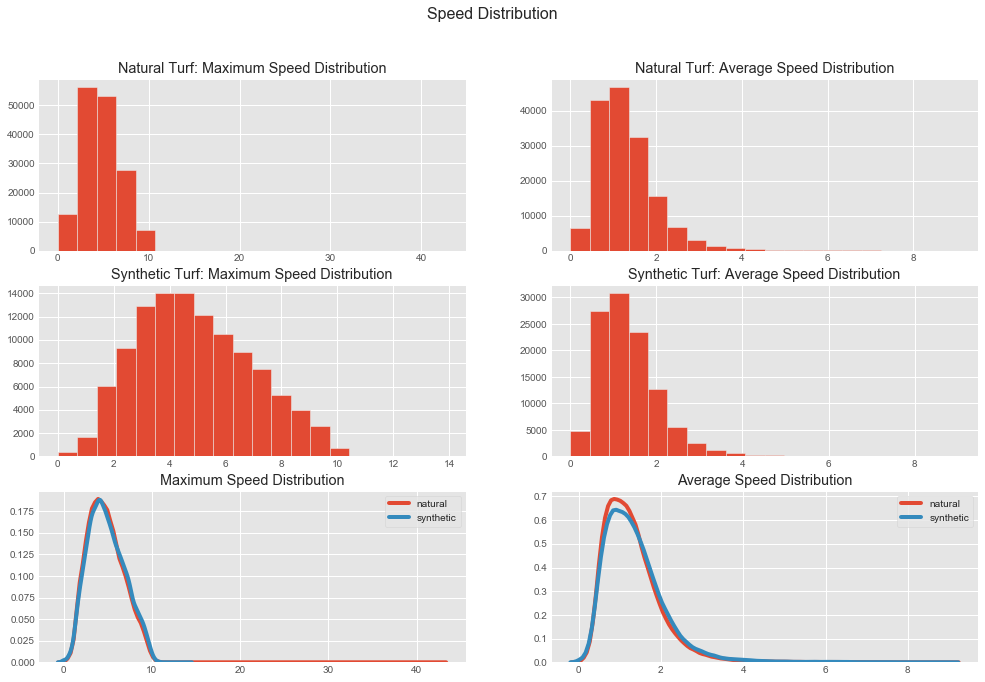

In [133]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df[motion_df.FieldType == 'Natural'].s_max, bins = 20)
axs[0,0].set_title('Natural Turf: Maximum Speed Distribution')

axs[1,0].hist(motion_df[motion_df.FieldType == 'Synthetic'].s_max, bins = 20)
axs[1,0].set_title('Synthetic Turf: Maximum Speed Distribution')

axs[0,1].hist(motion_df[motion_df.FieldType =='Natural'].s_avg, bins = 20)
axs[0,1].set_title('Natural Turf: Average Speed Distribution')

axs[1,1].hist(motion_df[motion_df.FieldType == 'Synthetic'].s_avg, bins = 20)
axs[1,1].set_title('Synthetic Turf: Average Speed Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].s_max, ax = axs[2,0], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].s_max,ax = axs[2,0], label='synthetic')
axs[2,0].set_title('Maximum Speed Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].s_avg, ax = axs[2,1], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].s_avg,ax = axs[2,1], label='synthetic')
axs[2,1].set_title('Average Speed Distribution')

plt.suptitle('Speed Distribution', fontsize=16)
plt.show()

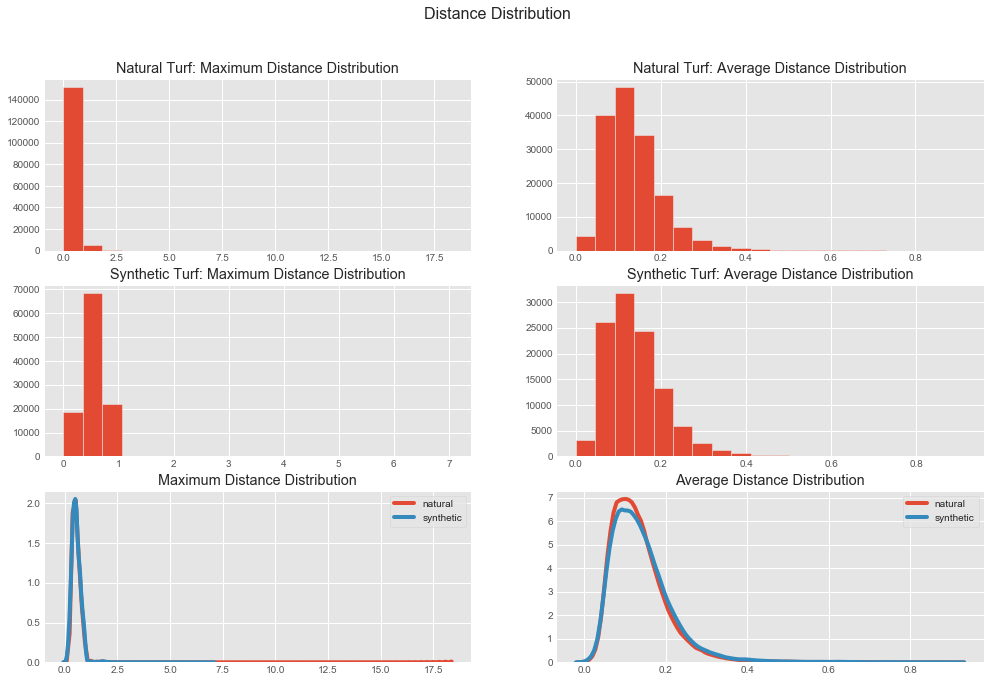

In [134]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df[motion_df.FieldType == 'Natural'].dis_max, bins = 20)
axs[0,0].set_title('Natural Turf: Maximum Distance Distribution')

axs[1,0].hist(motion_df[motion_df.FieldType == 'Synthetic'].dis_max, bins = 20)
axs[1,0].set_title('Synthetic Turf: Maximum Distance Distribution')

axs[0,1].hist(motion_df[motion_df.FieldType =='Natural'].dis_avg, bins = 20)
axs[0,1].set_title('Natural Turf: Average Distance Distribution')

axs[1,1].hist(motion_df[motion_df.FieldType == 'Synthetic'].dis_avg, bins = 20)
axs[1,1].set_title('Synthetic Turf: Average Distance Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].dis_max, ax = axs[2,0], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].dis_max,ax = axs[2,0], label='synthetic')
axs[2,0].set_title('Maximum Distance Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].dis_avg, ax = axs[2,1], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].dis_avg,ax = axs[2,1], label='synthetic')
axs[2,1].set_title('Average Distance Distribution')

plt.suptitle('Distance Distribution', fontsize=16)
plt.show()

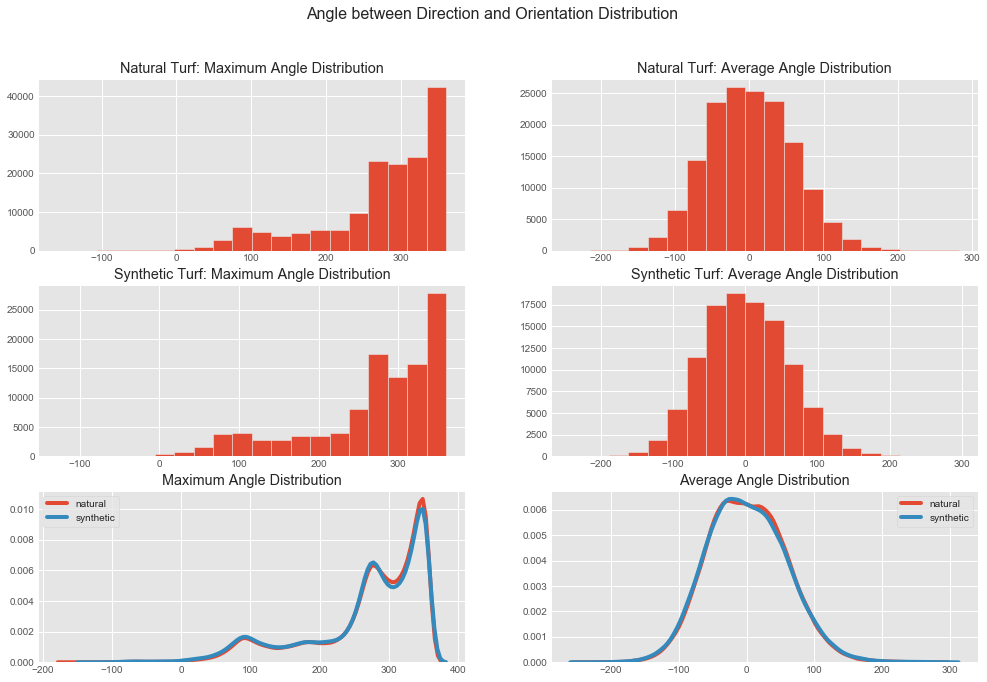

In [135]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].hist(motion_df[motion_df.FieldType == 'Natural'].angle_max, bins = 20)
axs[0,0].set_title('Natural Turf: Maximum Angle Distribution')

axs[1,0].hist(motion_df[motion_df.FieldType == 'Synthetic'].angle_max, bins = 20)
axs[1,0].set_title('Synthetic Turf: Maximum Angle Distribution')

axs[0,1].hist(motion_df[motion_df.FieldType =='Natural'].angle_avg, bins = 20)
axs[0,1].set_title('Natural Turf: Average Angle Distribution')

axs[1,1].hist(motion_df[motion_df.FieldType == 'Synthetic'].angle_avg, bins = 20)
axs[1,1].set_title('Synthetic Turf: Average Angle Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].angle_max, ax = axs[2,0], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].angle_max,ax = axs[2,0], label='synthetic')
axs[2,0].set_title('Maximum Angle Distribution')

sns.kdeplot(motion_df[motion_df.FieldType == 'Natural'].angle_avg, ax = axs[2,1], label='natural')
sns.kdeplot(motion_df[motion_df.FieldType == 'Synthetic'].angle_avg,ax = axs[2,1], label='synthetic')
axs[2,1].set_title('Average Angle Distribution')

plt.suptitle('Angle between Direction and Orientation Distribution', fontsize=16)
plt.show()

# Deep Dive 

In [52]:
pList.Weather=pList.Weather.replace({'Indoors': 'Controlled Climate', 'Rain': 'Rain and Bad', 
                                     'N/A (Indoors)': 'Controlled Climate', 'Snow': 'Rain and Bad',
                                     'Indoor': 'Controlled Climate', 'Overcast': 'Rain and Bad',
                                     'N/A Indoor': 'Controlled Climate', 'Clear and cold': 'Clear',
                                     'Mostly Cloudy': 'Cloudy', 'Sunny and clear': 'Sunny',
                                     'Mostly cloudy': 'Cloudy', 'Rain Chance 40%': 'Rain and Bad',
                                     'Cloudy and cold': 'Cloudy', 'Sunny, highs to upper 80s': 'Sunny',
                                     'Cloudy and Cool': 'Cloudy', 'Cloudy, light snow accumulating 1-3"': 'Rain and Bad',
                                     'Partly cloudy': 'Partly Cloudy', 'Scattered Showers': 'Rain and Bad',
                                     'Party Cloudy': 'Partly Cloudy', 'Cold': 'Rain and Bad',
                                     'Partly Clouidy': 'Partly Cloudy', 'Sunny and cold': 'Sunny', 
                                     'Mostly Coudy': 'Partly Cloudy', 'Partly sunny': 'Sunny',
                                     'cloudy': 'Cloudy', 'Cloudy, fog started developing in 2nd quarter ': 'Rain and Bad',                                     'Coudy': 'Cloudy', 'Showers': 'Rain and Bad',
                                     'Mostly Sunny': 'Sunny', 'Rainy': 'Rain and Bad',
                                     'Partly Sunny': 'Sunny', 'Clear to Partly Cloudy': 'Partly Cloudy',
                                     'Mostly sunny': 'Sunny', 'Rain shower': 'Rain and Bad',
                                     'Sunny Skies': 'Sunny', 'Heat Index 95': 'Rain and Bad',
                                     'Sunny and warm': 'Sunny', 'Cloudy, Rain': 'Rain and Bad',
                                     'Clear and Sunny': 'Clear', 'Heavy lake effect snow': 'Rain and Bad',
                                     'Clear and sunny': 'Clear', '30% Chance of Rain': 'Rain and Bad', 
                                     'Mostly Sunny Skies': 'Sunny', 'Cloudy, chance of rain ': 'Rain and Bad',
                                     'Clear Skies': 'Clear', 'Cloudy, 50% change of rain': 'Rain and Bad',
                                     'Clear skies': 'Clear', 'Rain likely, temps in low 40s.': 'Rain and Bad',
                                     'Clear and Cool': 'Clear', 'Sunny, Windy': 'Sunny',
                                     'Fair': 'Clear', 'Cloudy, fog started developing in 2nd quarter': 'Rain and Bad',
                                     'Light Rain': 'Rain and Bad', '10% Chance of Rain': 'Rain and Bad',
                                     'Clear and warm': 'Clear', 'Cloudy, chance of rain': 'Cloudy',
                                     'Hazy': 'Cloudy', 'Partly clear': 'Clear', 'Sun & clouds': 'Sunny',
                                    'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.': 'Rain and Bad'})     

In [53]:
pList.Weather=pList.Weather.replace({'Controlled Climate': 'CC',
                                    'Rain and Bad': 'RaB',
                                    'Clear': 'Cr',
                                    'Sunny': 'Sun',
                                    'Partly Cloudy': 'PC',
                                    'Cloudy': 'Cl',
                                    'NoData': 'ND'})

##  Player connection with Field

In [9]:
print(len(iRecord))
print(iRecord.PlayerKey.nunique())

105
100


## Player Position connection with Field 

In [57]:
injrec_full=pd.merge(pList, iRecord, how='right')
injrec_full['Injuries']=injrec_full[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum(axis=1)
inj_dict={1: 'Fine', 2: 'Little problem', 3: 'Serious Trouble', 4: 'Catastrophic Event'}
injrec_full['Injuries']=injrec_full['Injuries'].map(inj_dict)
injrec_full.drop(['DM_M1','DM_M7', 'DM_M28', 'DM_M42'], axis=1, inplace=True)
injrec_full.tail(3)

PlayerKey    GameID PlayKey RosterPosition  PlayerDay  PlayerGame  \
102      47285   47285-4     NaN            NaN        NaN         NaN   
103      37068  37068-19     NaN            NaN        NaN         NaN   
104      36696  36696-24     NaN            NaN        NaN         NaN   

    StadiumType FieldType  Temperature Weather PlayType  PlayerGamePlay  \
102         NaN       NaN          NaN     NaN      NaN             NaN   
103         NaN       NaN          NaN     NaN      NaN             NaN   
104         NaN       NaN          NaN     NaN      NaN             NaN   

    Position PositionGroup BodyPart    Surface        Injuries  
102      NaN           NaN     Knee    Natural  Little problem  
103      NaN           NaN     Knee    Natural  Little problem  
104      NaN           NaN     Knee  Synthetic  Little problem

In [58]:
miss_data=pList.loc[pList['GameID']=='33337-2'].tail(1)
for i in range(78, len(injrec_full)):
    miss_data=miss_data.append(pList.loc[pList['GameID']==injrec_full.iloc[i][1]].tail(1))

In [59]:
injrec_full=injrec_full.append(miss_data, sort=False)

def get_column_array(injrec_full, column):
    expected_length = len(injrec_full)
    current_array = injrec_full[column].dropna().values
    if len(current_array) < expected_length:
        current_array = np.append(current_array, [''] * (expected_length - len(current_array)))
    return current_array

injrec_full=pd.DataFrame({column: get_column_array(injrec_full, column) for column in injrec_full.columns})

injrec_full.replace('', np.nan, inplace=True)
injrec_full=injrec_full.dropna(thresh=10)
injrec_full.tail(3)

PlayerKey    GameID      PlayKey RosterPosition PlayerDay PlayerGame  \
102      47285   47285-4   47285-4-16  Wide Receiver      22.0        4.0   
103      37068  37068-19  37068-19-20     Linebacker     417.0       19.0   
104      36696  36696-24  36696-24-22     Cornerback     439.0       24.0   

    StadiumType  FieldType Temperature Weather              PlayType  \
102         NaN    Natural        68.0     NaN                  Rush   
103         NaN    Natural        56.0     NaN     Punt Not Returned   
104         NaN  Synthetic        68.0     NaN  Kickoff Not Returned   

    PlayerGamePlay Position PositionGroup BodyPart    Surface        Injuries  
102           16.0       WR            WR     Knee    Natural  Little problem  
103           20.0      OLB            LB     Knee    Natural  Little problem  
104           22.0       CB            DB     Knee  Synthetic  Little problem

In [60]:
injrec_full['Temperature']=injrec_full['Temperature'].astype(float)
injrec_full['PlayerDay']=injrec_full['PlayerDay'].astype(float)
injrec_full['PlayerGame']=injrec_full['PlayerGame'].astype(float)
injrec_full['PlayerGamePlay']=injrec_full['PlayerGamePlay'].astype(float)

In [44]:
pList = pList[pList.PositionGroup != 'Missing Data']

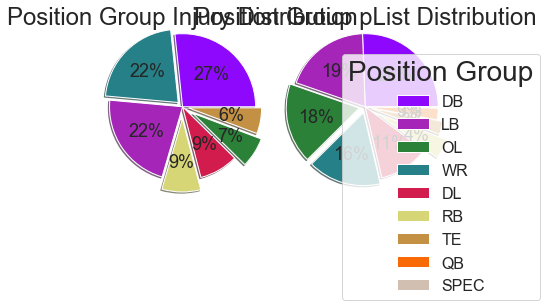

In [46]:
fig, axs = plt.subplots(1, 2)

axs[0].pie(injrec_full['PositionGroup'].value_counts(),
           radius=1.2,
           autopct='%1.0f%%',
           explode=(0, 0.1, 0, 0.2, 0, 0.2, 0.1),
          colors=['#8E08FE' ,'#258187', '#A525B9', '#D6D676', '#D11C4D', '#2B8138', '#C49144'],
           textprops={'fontsize': 18},
          shadow=True)

axs[1].pie(pList['PositionGroup'].value_counts(),
           radius=1.2,
           autopct='%1.0f%%',
            explode=(0, 0, 0.1, 0.1, 0, 0.25, 0.1, 0, 0),
          colors=['#8E08FE', '#A525B9', '#2B8138','#258187', '#D11C4D', '#D6D676', '#C49144', '#F96905', '#D1BFB2'],
           textprops={'fontsize': 18},
          shadow=True)

axs[0].set_title('Position Group Injury Distribution',
                     fontsize= 24)

axs[1].set_title('Position Group pList Distribution',
                     fontsize= 24)

axs[1].legend(labels=pList['PositionGroup'].value_counts().index,
    loc='upper right',
    prop={'size': 16},
     bbox_to_anchor=(1.7, 0.9),
             title='Position Group',
             title_fontsize='28')

plt.show()

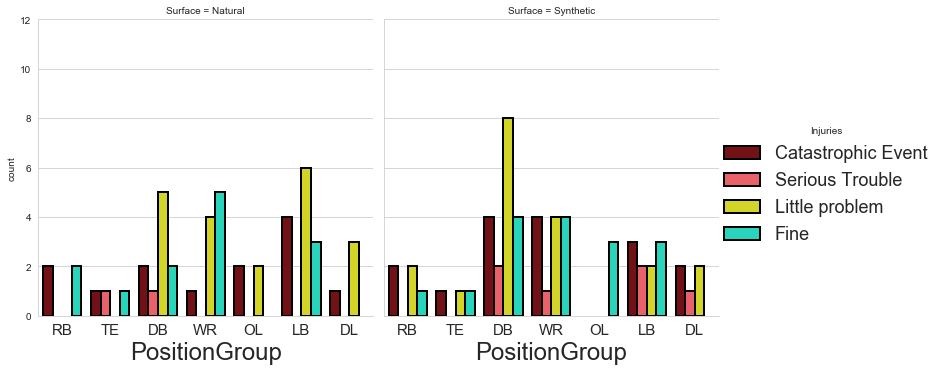

In [47]:
 chart=sns.catplot(x='PositionGroup', hue='Injuries', data=injrec_full, col='Surface', kind='count',
                  palette=['#820108', '#FF4C56', '#EEF10B', '#0BF1CE'],edgecolor=(0,0,0),
                  linewidth=2, legend=False)

chart.set_xticklabels(size=15)

chart.set_xlabels(size=24)

chart.set(yticks=range(0, 13,2))

chart.add_legend(prop={'size': 18},
            title='Injuries',
            title_fontsize='30')

plt.show()

DB and WR position groups are more dangerous on the synthetic field, but for OL position synthetic surface is really good.
DB has more ankle injuries on the synthetic field.


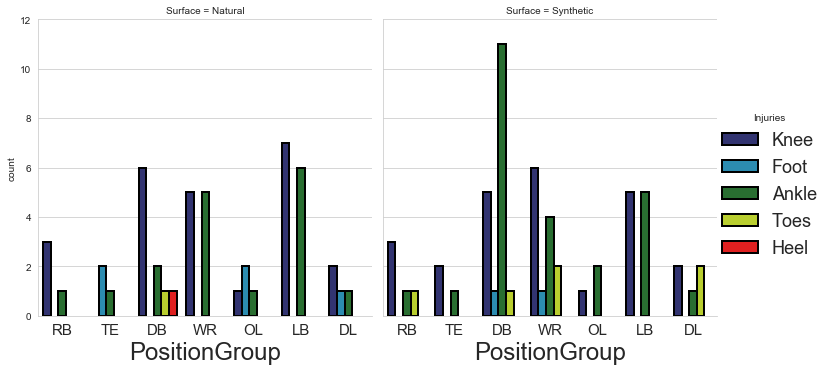

In [33]:
chart=sns.catplot(x='PositionGroup', hue='BodyPart', data=injrec_full, col='Surface', kind='count',
                  palette=['#272A7C', '#1696C6', '#1E7928', '#CCE914', '#FF0000'],edgecolor=(0,0,0),
                  linewidth=2, legend=False)
                  #height=15, aspect=1)
    
chart.set_xticklabels(size=15)

chart.set_xlabels(size=24)

chart.add_legend(prop={'size': 18},
            title='Injuries',
            title_fontsize='30')

chart.set(yticks=range(0, 13,2))

plt.show()

Most injured players Rush and Pass play type, but this is due to their advantage in the number of games. Based on the game to injury ratio, Punt and Kickoff players have more injuries. With 4% and 5% of the total number of games, the number of injuries is 14% and 11%, respectively.

## Weather connection with Field 

In [61]:
injrec_full.Weather.nunique()

6

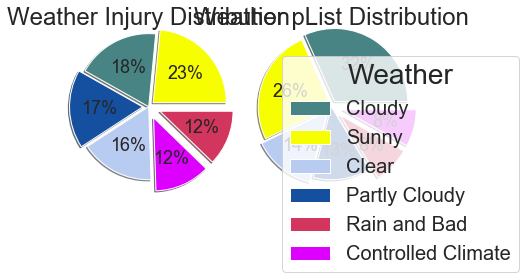

In [63]:
wth=['Cloudy', 'Sunny', 'Clear', 'Partly Cloudy','Rain and Bad', 'Controlled Climate']

fig, axs = plt.subplots(1, 2)

axs[0].pie(injrec_full['Weather'].value_counts(),
           radius=1.2,
           autopct='%1.0f%%',
         explode=(0.1, 0, 0.1, 0, 0.2, 0.2),
          colors=['#F7FE00', '#498484', '#1550A0', '#B8CCF2', '#DE00FF', '#D2355D'],
           textprops={'fontsize': 18},
          shadow=True)

axs[1].pie(pList['Weather'].value_counts(),
           radius=1.2,
           autopct='%1.0f%%',
            explode=(0.1, 0, 0.1, 0, 0.2, 0.2),
         colors=['#498484', '#F7FE00', '#B8CCF2','#1550A0', '#D2355D', '#DE00FF'],
           textprops={'fontsize': 18},
          shadow=True)

axs[0].set_title('Weather Injury Distribution',
                     fontsize=24)
axs[1].set_title('Weather pList Distribution',
                     fontsize=24)

axs[1].legend(labels=wth,
    loc='upper right',
    prop={'size': 20},
     bbox_to_anchor=(1.8, 0.9),
             title='Weather',
             title_fontsize='28')

plt.show()

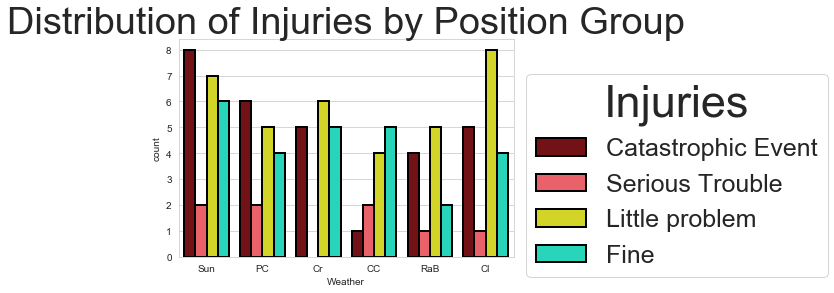

In [64]:
chart1=sns.countplot(x='Weather', hue='Injuries', data=injrec_full, 
              palette=['#820108', '#FF4C56', '#EEF10B', '#0BF1CE'],
             edgecolor=(0,0,0),
                  linewidth=2)

chart1.set_title('Distribution of Injuries by Position Group',
                     fontsize= 38)

chart1.legend(prop={'size': 25},
     bbox_to_anchor=(1, 0.9), title='Injuries',
            title_fontsize='45')

plt.show()

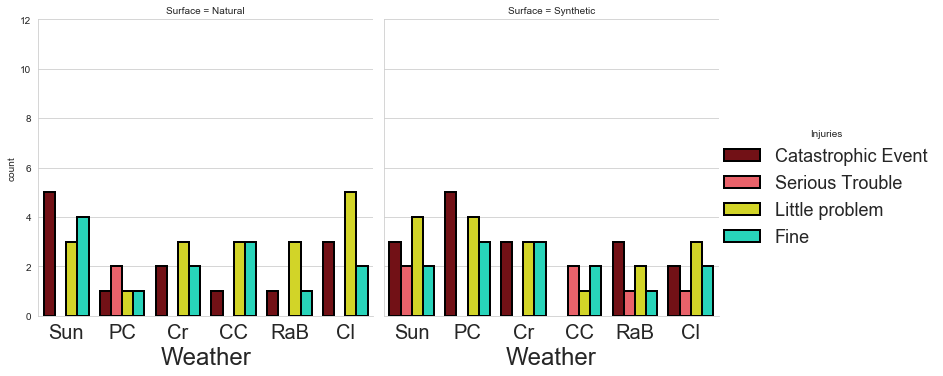

In [65]:
chart=sns.catplot(x='Weather', hue='Injuries', data=injrec_full, col='Surface', kind='count', 
                  palette=['#820108', '#FF4C56', '#EEF10B', '#0BF1CE'],edgecolor=(0,0,0),
                  linewidth=2, legend=False)

chart.set_xticklabels(size=20)

chart.set_xlabels(size=24)

chart.set(yticks=range(0, 13,2))

chart.add_legend(prop={'size': 18},
            title='Injuries',
            title_fontsize='80')

plt.show()

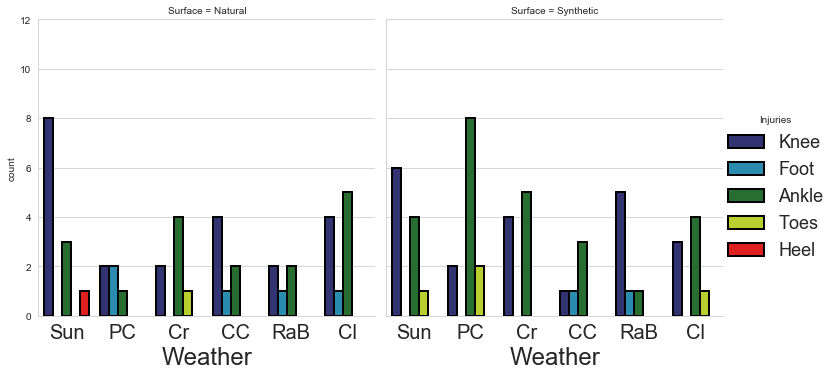

In [66]:
chart=sns.catplot(x='Weather', hue='BodyPart', data=injrec_full, col='Surface', kind='count',
                  palette=['#272A7C', '#1696C6', '#1E7928', '#CCE914', '#FF0000'],edgecolor=(0,0,0),
                  linewidth=2, legend=False)

chart.set_xticklabels(size=20)

chart.set_xlabels(size=24)

chart.set(yticks=range(0, 13,2))

chart.add_legend(prop={'size': 18},
            title='Injuries',
            title_fontsize='30')

plt.show()

An interesting weather observation that the most dangerous is sunny, clear and partially cloudy weather, which also confirms the comparison of average and median temperatures. Moreover, there are the greatest number of catastrophic injuries in sunny weather 
And much safer is cloudy weather. With 29% of all injury games, it accounts for only 17%, which is almost two times less.